# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

import plotly.graph_objs as go
from plotly.subplots import make_subplots

sns.color_palette("plasma")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Dataset
---

In [2]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])

data1 = data.copy()

data.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [4]:
data.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     440.000000      377.000000           377.000000  444.000000   
mean    12747.554545    14598.204244            48.236894    4.031306   
std     17760.666099    15450.028869            24.109830    0.550548   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2180.750000     5999.000000            33.337037    3.900000   
50%      3999.000000     7999.000000            54.550414    4.100000   
75%     17121.750000    17999.000000            66.677780    4.300000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         391.000000           418.000000  
mean        11594.726343            14.077392  
std         40423.889227             7.718503  
min             1.000000             0.750000  
25%            68.500000             8.000000  
50%           996.000000            17.500000  
75%          6022.000000            22.000000  
max        619130.000000            22.000000

## Vizuelizacija podataka
---


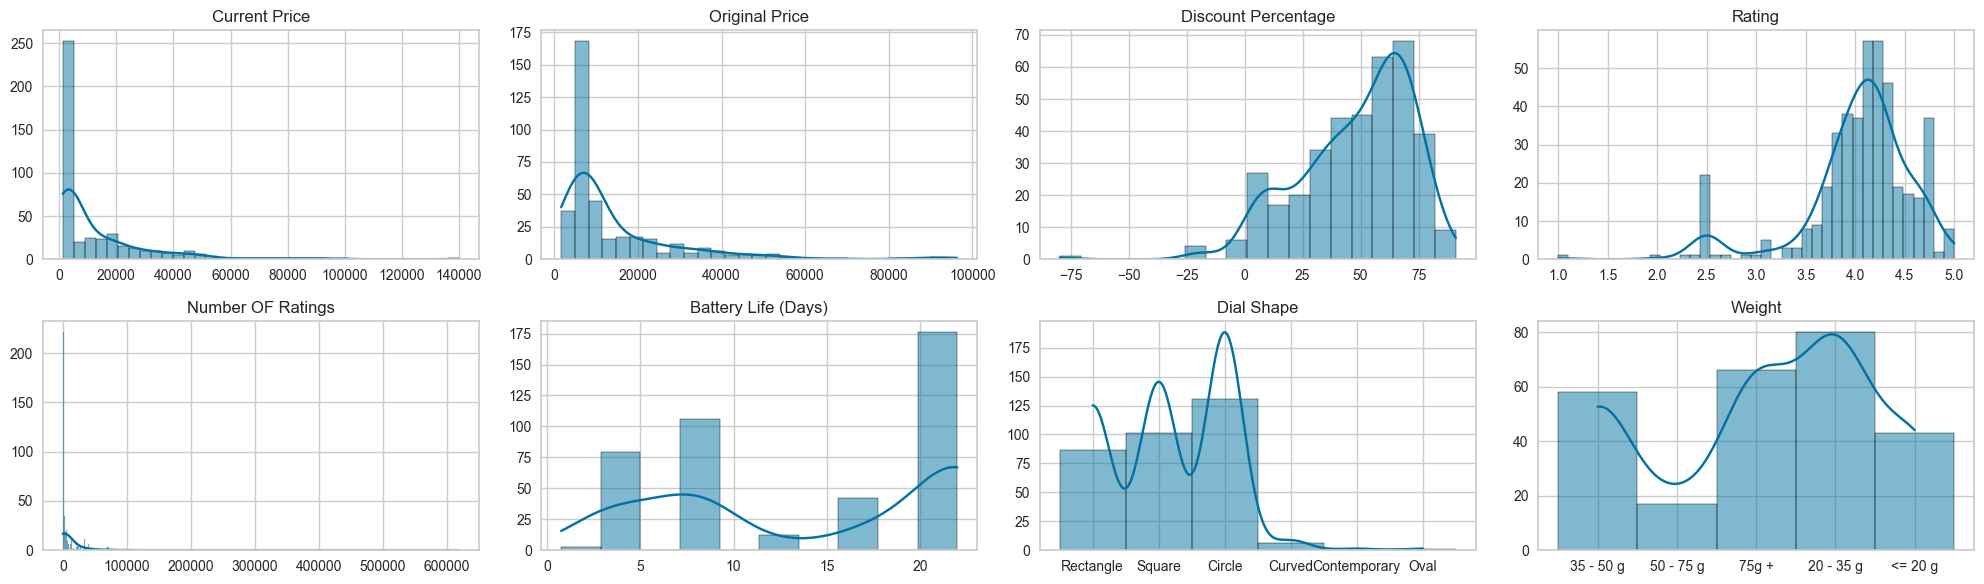

In [5]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

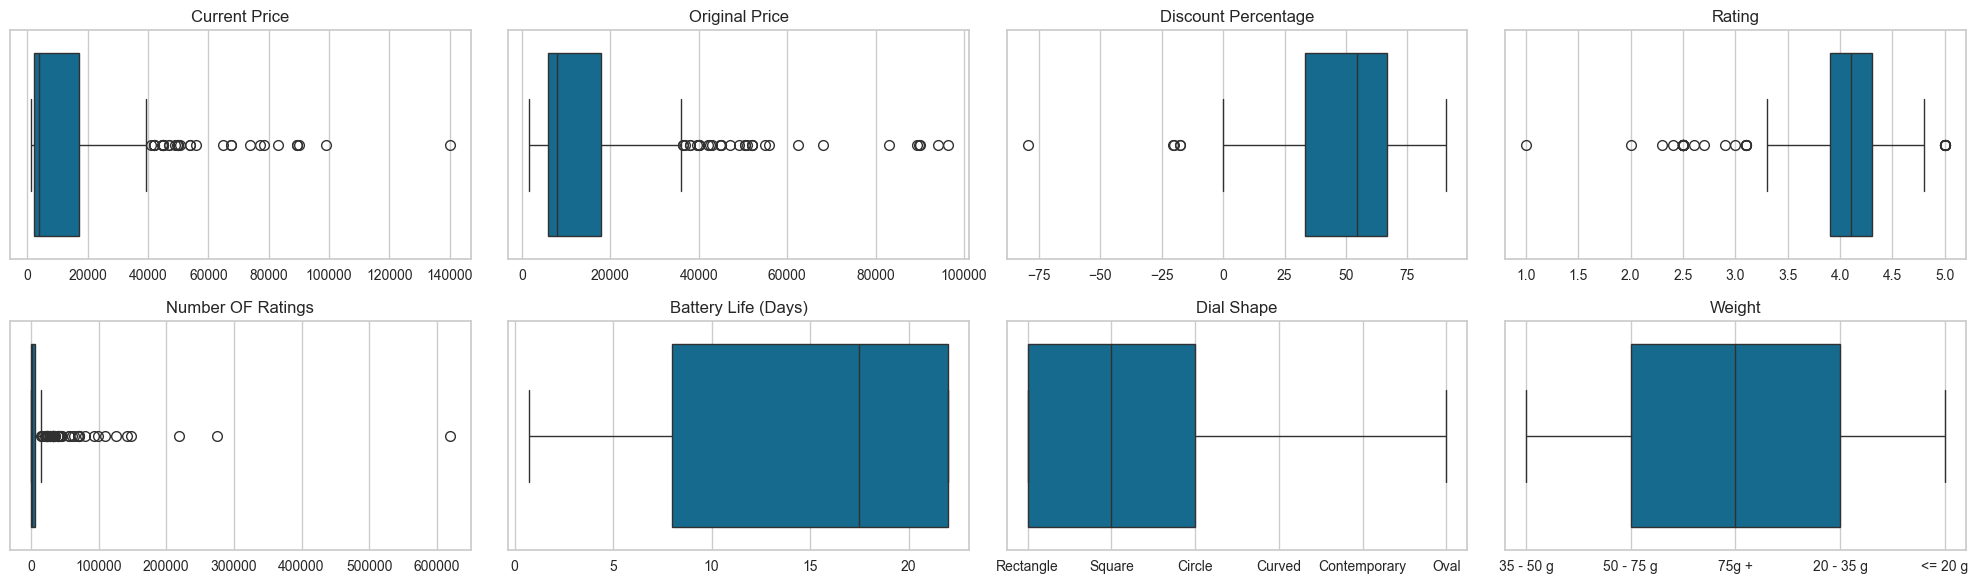

In [6]:

columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.boxplot( x=column_name,  ax=axes[i], data=data)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()


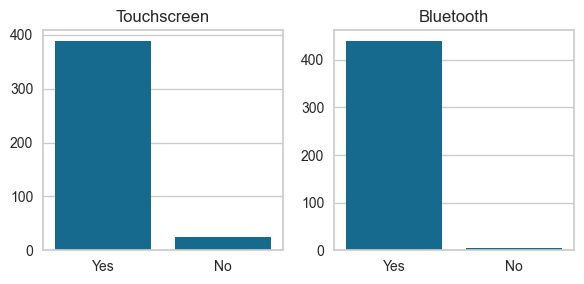

In [7]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

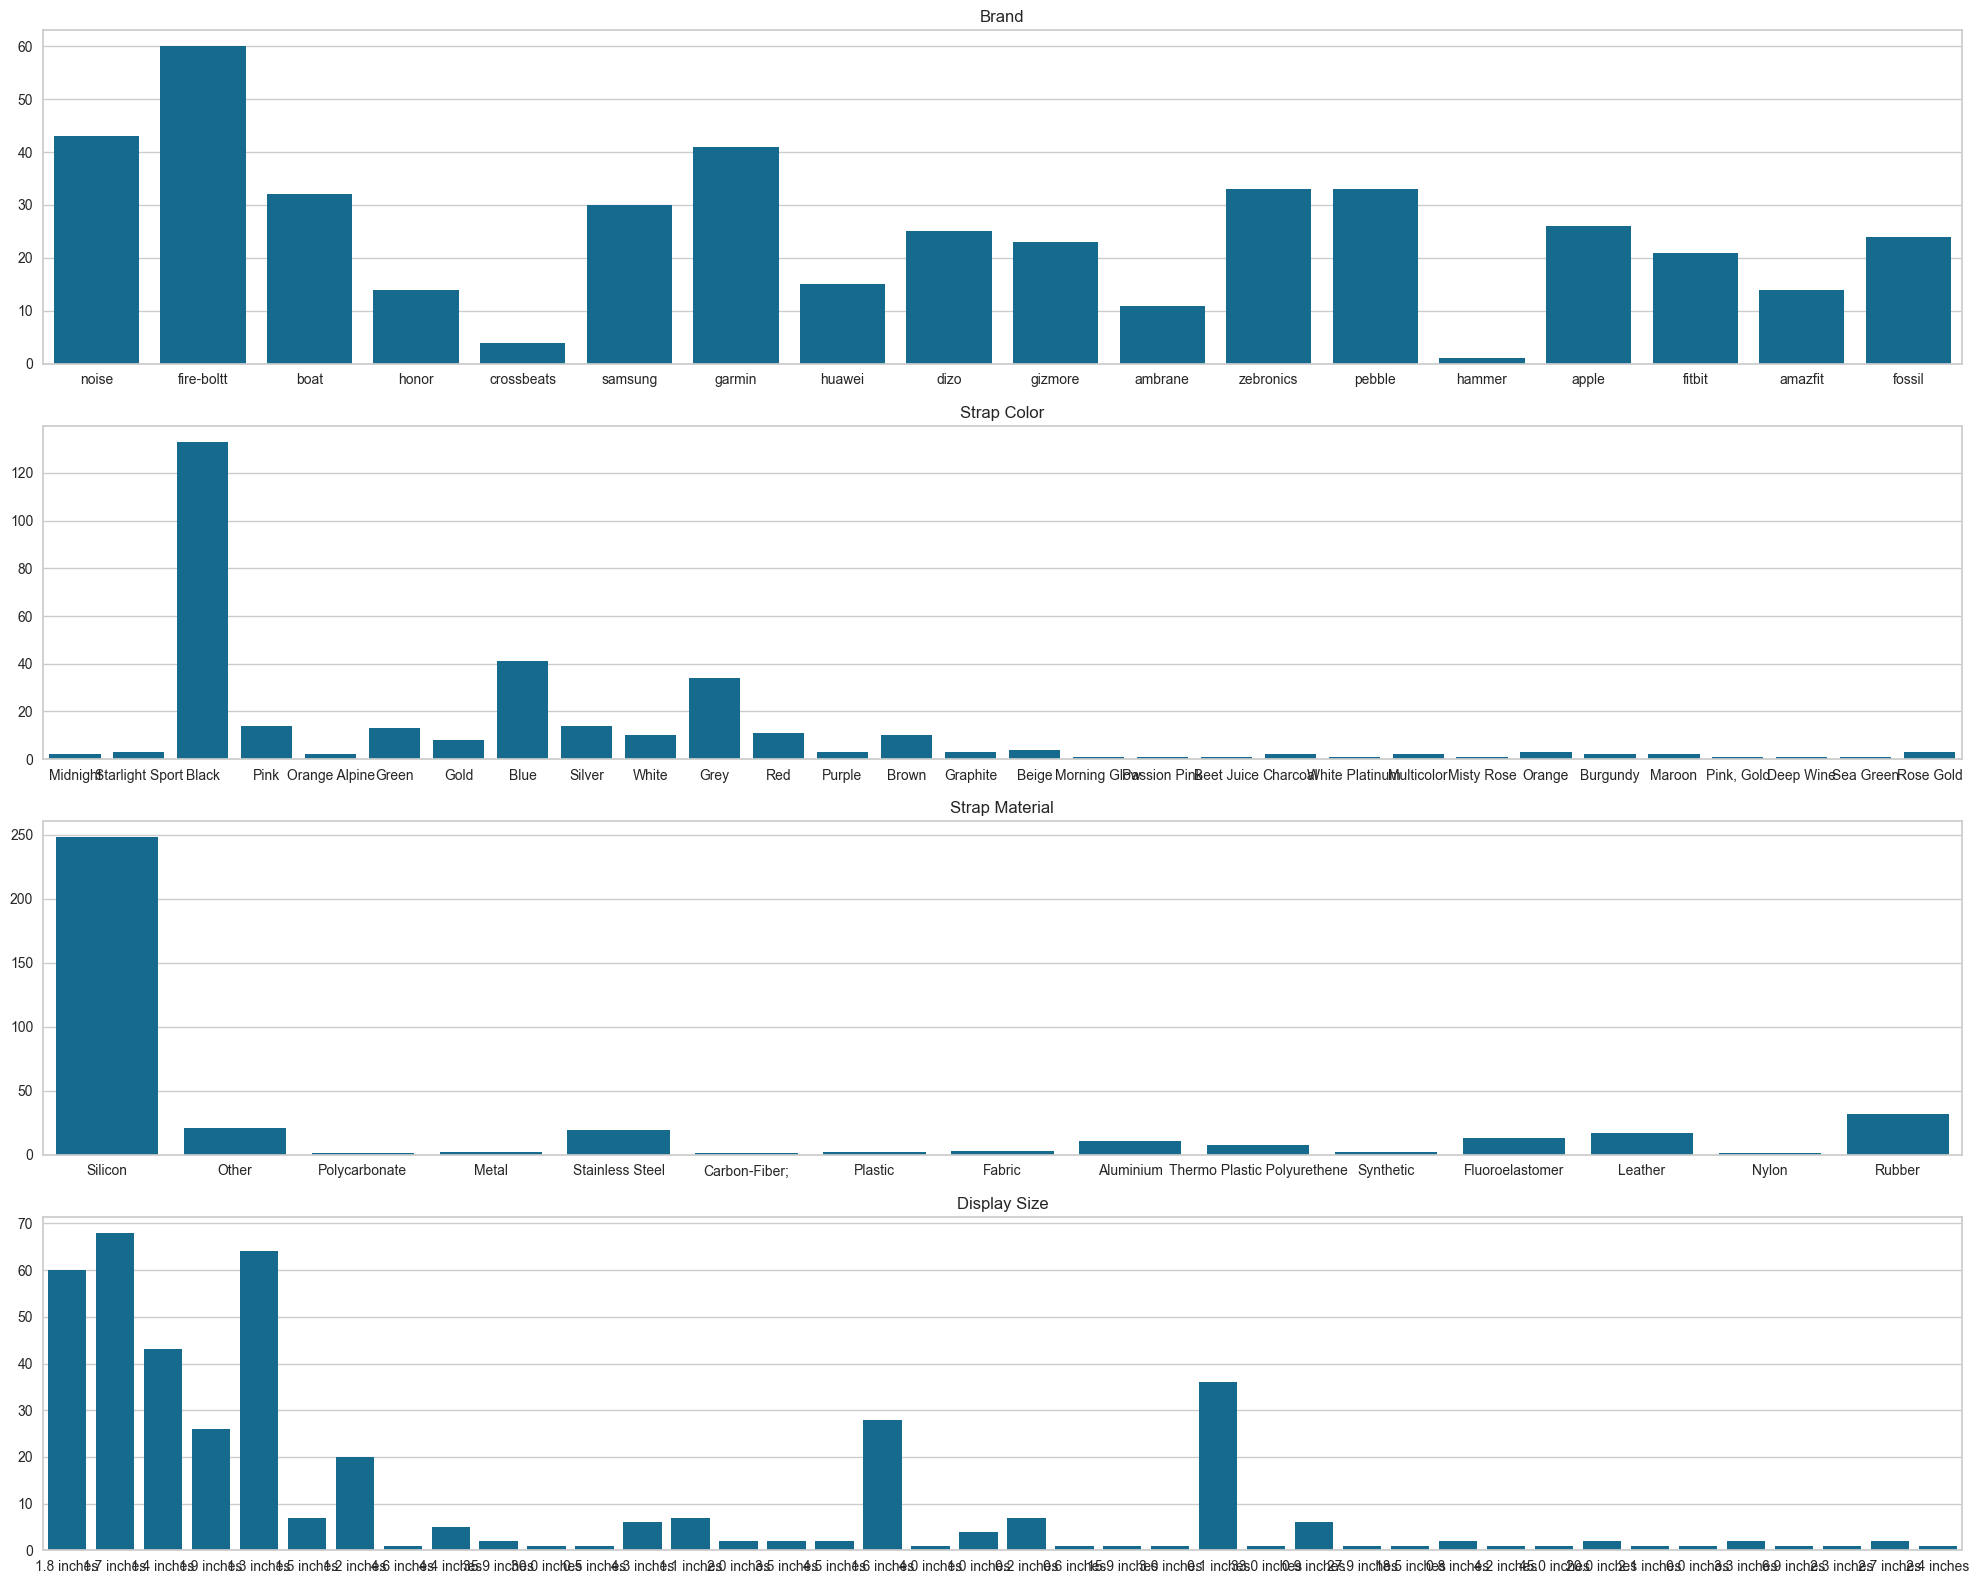

In [8]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

plt.tight_layout()
plt.show()

Kod ovih kategorickig podataka može se uočiti dosta kategorija, koje bi trebalo grupisati na što manje grupa.

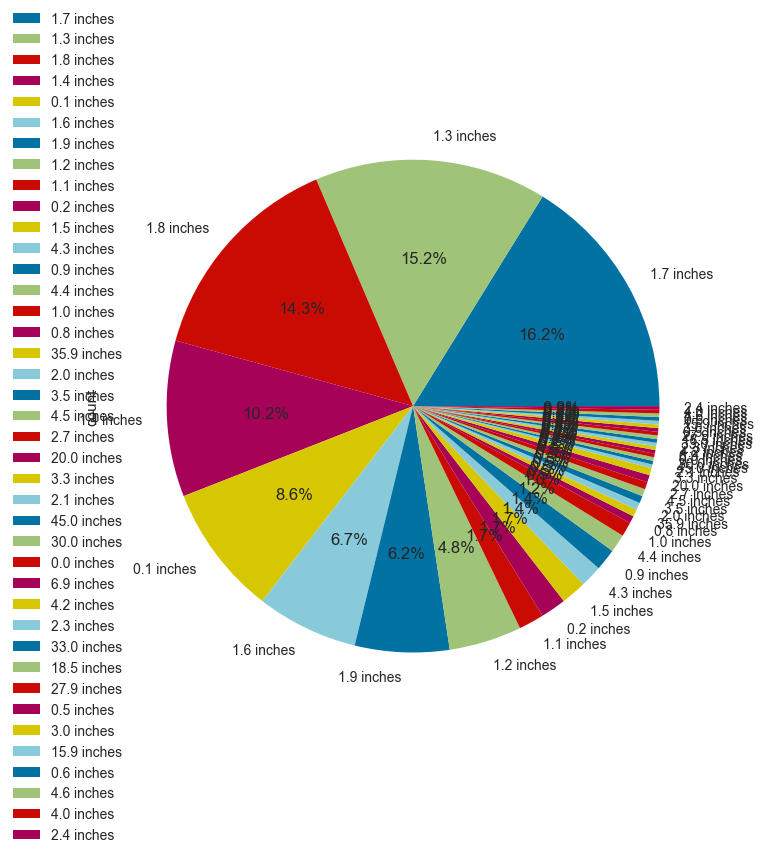

In [9]:

plt.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc="upper left")
plt.show()

## Transformacija podataka
----

Provera i uklanjenje duplikata:

In [10]:
print("Number Of Rows In The Original DataFrame:", len(data))

data = data.drop_duplicates()

print("Number Of Rows After Deduping:", len(data))

data1 = data1.drop_duplicates()

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


Izbacuje se kolona **Model Name** koja ima previše različitih vrednosti.

In [11]:
data1 = data1.drop(columns=['Model Name'])

### Određivanje i rešavanje outliera

#### Standard Deviation Method

In [12]:
columns = ['Current Price', 'Original Price',  'Number OF Ratings']

for column in columns:
    data_mean, data_std = mean(data[column]), std(data[column])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    data_no_outliers = data[(data[column] >= lower) & (data[column] <= upper)]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 21 
Original Price Identified outliers: 18 
Number OF Ratings Identified outliers: 9 


#### Interquartile Range Method

In [13]:
for column in columns:
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
  
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[column] if x < lower or x > upper]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


#### Logaritam za ublazavanje outliera

In [14]:
for column in columns:
    data1[column] = [np.log(x) for x in data1[column]]

#### Brisanje outliera

In [15]:
data2 = data.copy()

data2 = data2[data2['Original Price'] < 60000]
data2 = data2[data2['Current Price'] < 100000]
data2 = data2[data2['Number OF Ratings'] < 100000]

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 1 to 442
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                308 non-null    object 
 1   Current Price        308 non-null    float64
 2   Original Price       308 non-null    float64
 3   Discount Percentage  308 non-null    float64
 4   Rating               308 non-null    float64
 5   Number OF Ratings    308 non-null    float64
 6   Model Name           281 non-null    object 
 7   Dial Shape           208 non-null    object 
 8   Strap Color          208 non-null    object 
 9   Strap Material       253 non-null    object 
 10  Touchscreen          277 non-null    object 
 11  Battery Life (Days)  282 non-null    float64
 12  Bluetooth            304 non-null    object 
 13  Display Size         284 non-null    object 
 14  Weight               201 non-null    object 
dtypes: float64(6), object(9)
memory usage: 38.5+ 

In [16]:
def printHistplot(columns, data):
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
    plt.tight_layout()
    plt.show()


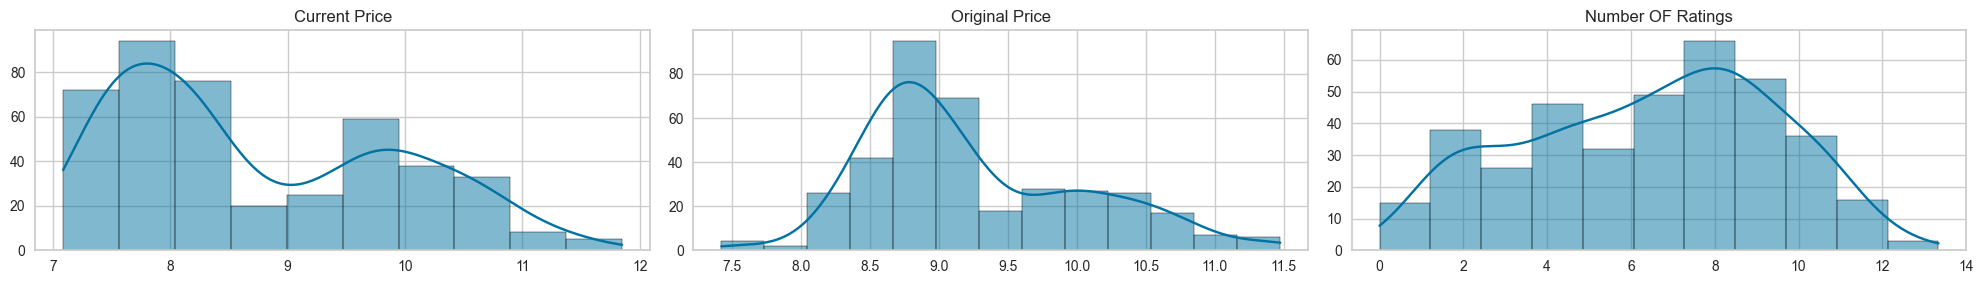

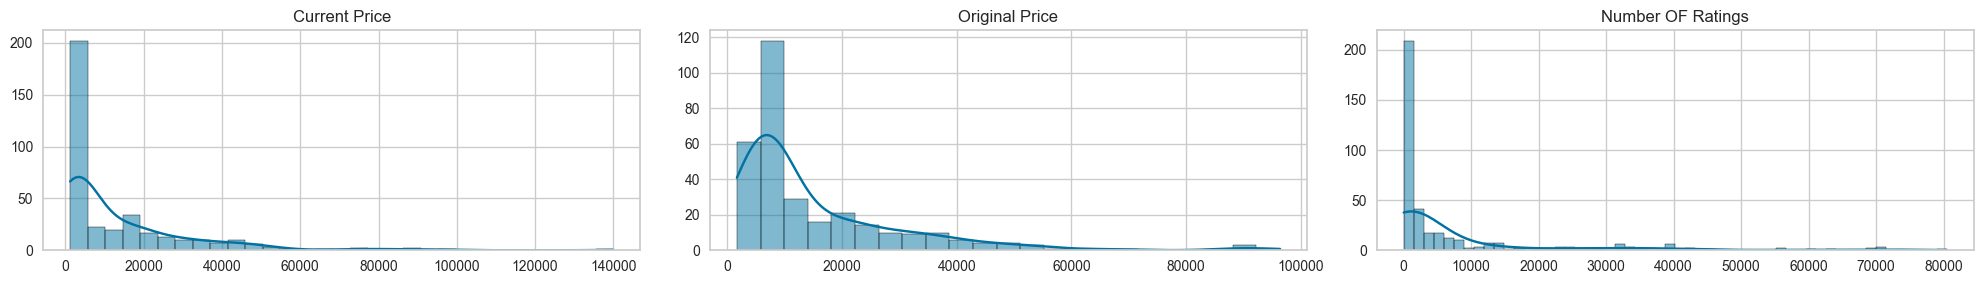

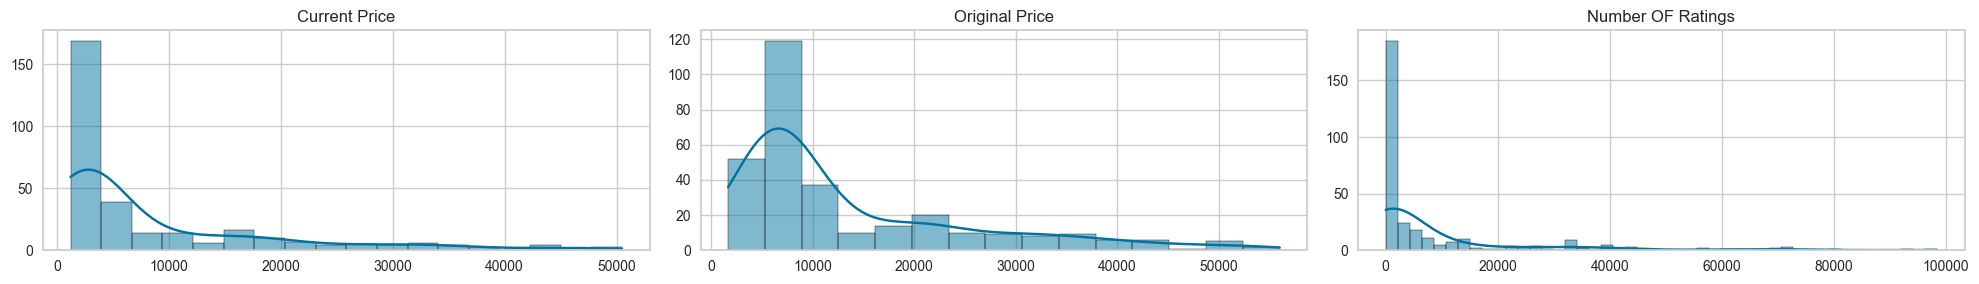

In [17]:
printHistplot(columns, data1)
printHistplot(columns, data_no_outliers)
printHistplot(columns, data2)

Pošto dataset sadrži samo 440 redova, za rešavanje outliera bira se logaritmovanje kako bi se sačuvala veća količina podataka.


Sredjivanje negativnih vrednosti u koloni **Discount Percentage**

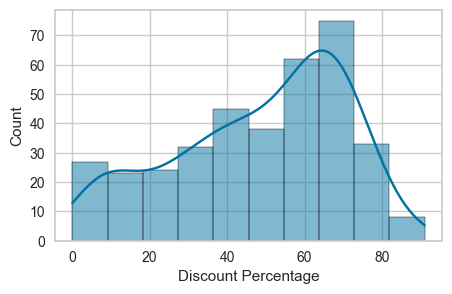

In [18]:
data1["Discount Percentage"] = [np.abs(x) for x in data["Discount Percentage"]]
plt.figure(figsize=(5, 3))
sns.histplot(x="Discount Percentage", data=data1,  kde=True)
plt.show()

### Ispitivanje nedostajućih vrednosti

In [19]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}
for column in data.columns:
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T


Count      %
Brand                  0.0   0.00
Current Price         10.0   2.27
Original Price        73.0  16.59
Discount Percentage   73.0  16.59
Rating                 6.0   1.36
Number OF Ratings     59.0  13.41
Model Name            33.0   7.50
Dial Shape           113.0  25.68
Strap Color          113.0  25.68
Strap Material        66.0  15.00
Touchscreen           37.0   8.41
Battery Life (Days)   32.0   7.27
Bluetooth              6.0   1.36
Display Size          30.0   6.82
Weight               186.0  42.27

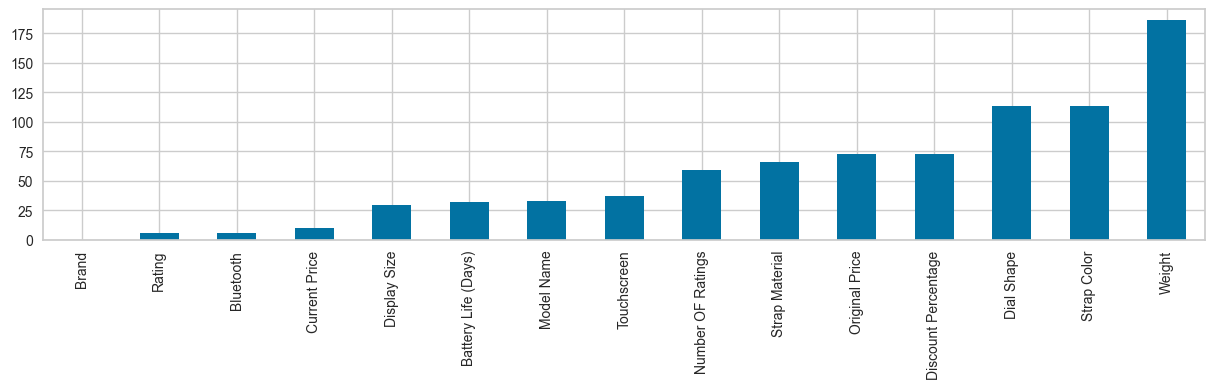

In [20]:
nan_count.plot(kind='bar', figsize=(15, 3))
plt.show()

Pošto kolona **weight** sadrži veliki broj nedostajućih vrednosti, ne uzimamo je u obzir prilikom dalje analize.

In [21]:
data1 = data1.drop(columns=['Weight'])

### Grupisanje kategoričkih podataka

In [22]:
data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float).round()
print(data1['Display Size'].value_counts())

Display Size
2.0     187
1.0     144
0.0      45
4.0      17
3.0       5
36.0      2
20.0      2
5.0       1
30.0      1
16.0      1
33.0      1
28.0      1
18.0      1
45.0      1
7.0       1
Name: count, dtype: int64


In [23]:
data1['Display Size'] = data1['Display Size'].apply(lambda x: 4 if 3 <= x <= 10 else (28 if x > 10 else x))
print(data1['Display Size'].round().value_counts())

Display Size
2.0     187
1.0     144
0.0      45
4.0      24
28.0     10
Name: count, dtype: int64


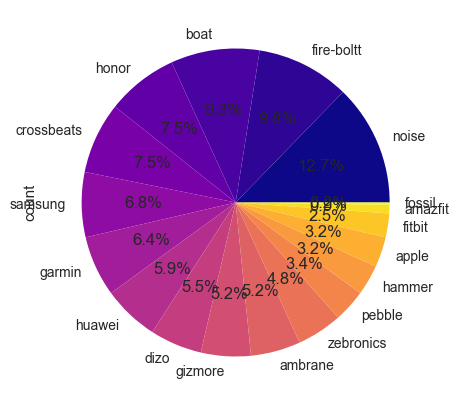

In [24]:
plt.figure(figsize=(5, 5))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%',cmap='plasma')
plt.show()

Podela brendova u 3 vrste prema populatnosti:  
1) top **15% - 7.5%**
2) middle **6.8% - 5.2%**
3) low **4.8% - 0%** 

In [25]:
scale_mapper = {
    'noise': 'top',
    'fire-boltt': 'top',
    'boat': 'top',
    'honor': 'top',
    'crossbeats': 'top',
    'samsung': 'middle',
    'garmin': 'middle',
    'huawei': 'middle',
    'dizo': 'middle',
    'gizmore': 'middle',
    'ambrane': 'middle',
    'zebronics': 'low',
    'pebble': 'low',
    'hammer': 'low',
    'apple': 'low',
    'fitbit': 'low',
    'amazfit': 'low',
    'fossil': 'low'
    }
data1["Brand"] = data["Brand"].replace(scale_mapper)

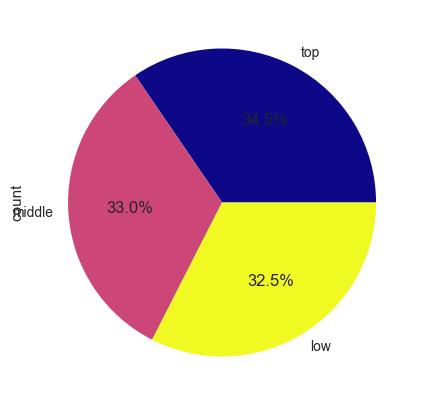

In [26]:
plt.figure(figsize=(5, 5))
pie = data1["Brand"].value_counts().plot(kind='pie', labels=data1["Brand"].unique(), autopct='%0.1f%%', cmap='plasma')
plt.show()

In [27]:
print(data["Strap Material"].value_counts())

scale_mapper = {
    'Silicon': 'Silicon',
    'Other': 'Other',
    'Rubber': 'Silicon',
    'Fluoroelastomer': 'Silicon',
    'Leather': 'Leather',
    'Metal': 'Metal',  
    'Stainless Steel': 'Metal',
    'Aluminium': 'Metal',
    'Polycarbonate': 'Other',
    'Carbon-Fiber;': 'Other',
    'Plastic': 'Other',
    'Fabric': 'Other',
    'Thermo Plastic Polyurethene': 'Other',
    'Synthetic': 'Other',
    'Nylon': 'Other'
    }
data1["Strap Material"] = data["Strap Material"].replace(scale_mapper)
print("-----------------")
print(data1["Strap Material"].value_counts())


Strap Material
Silicon                        241
Rubber                          32
Other                           21
Stainless Steel                 19
Leather                         17
Fluoroelastomer                 13
Aluminium                       11
Thermo Plastic Polyurethene      8
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64
-----------------
Strap Material
Silicon    286
Other       39
Metal       32
Leather     17
Name: count, dtype: int64


In [28]:
print(data['Dial Shape'].value_counts())
scale_mapper = {
    'Circle': 'Circle',
    'Square': 'Rectangle',
    'Rectangle': 'Rectangle',
    'Curved': 'Circle',
    'Contemporary': 'Circle',
    'Oval': 'Circle',
    }
data1["Dial Shape"] = data["Dial Shape"].replace(scale_mapper)
print(data1["Dial Shape"].value_counts())

Dial Shape
Circle          131
Square          101
Rectangle        87
Curved            6
Contemporary      1
Oval              1
Name: count, dtype: int64
Dial Shape
Rectangle    188
Circle       139
Name: count, dtype: int64


In [29]:

scale_mapper = {
    'Midnight': 'Black',
    'Starlight Sport': 'White',
    'Black': 'Black',
    'Pink': 'Pink',
    'Orange Alpine': 'Orange',
    'Green': 'Green',
    'Gold': 'Gold',
    'Blue': 'Blue',
    'Silver': 'Grey',
    'White': 'White',
    'Grey': 'Grey',
    'Red': 'Red',
    'Purple': 'Purple',
    'Brown': 'Brown',
    'Graphite': 'Grey',
    'Beige': 'Brown',
    'Morning Glow': 'Orange',
    'Passion Pink': 'Pink',
    'Beet Juice': 'Purple',
    'Charcoal': 'Grey',
    'White Platinum': 'White',
    'Multicolor': 'Multicolor',
    'Misty Rose': 'Pink',
    'Orange': 'Orange',
    'Burgundy': 'Red',
    'Maroon': 'Red',
    'Pink, Gold': 'Gold',
    'Deep Wine': 'Red',
    'Sea Green': 'Green',
    'Rose Gold': 'Gold'
}
data1["Strap Color"] = data["Strap Color"].replace(scale_mapper)
print('------------------')
print(data1['Strap Color'].value_counts())



------------------
Strap Color
Black         135
Grey           53
Blue           41
Pink           16
Red            16
White          14
Green          14
Brown          14
Gold           12
Orange          6
Purple          4
Multicolor      2
Name: count, dtype: int64


In [30]:

scale_mapper = {
     'Black' : 'Black',
    "Brown" : "Black",
    "Grey" : "Black",
    "Blue" : "Other",
    "Pink" : "Other",
    "Red" : "Other",
    "White" : "Other",
    "Green" : "Other",
    "Gold" : "Other",
    "Orange" : "Other",
    "Purple" : "Other",
    "Multicolor" : "Other"
}

data1["Strap Color"] = data1["Strap Color"].replace(scale_mapper)
print('------------------')
print(data1['Strap Color'].value_counts())

------------------
Strap Color
Black    202
Other    125
Name: count, dtype: int64


### Popunjavanje nedostajućih vrednosti


Strategije popunjavanja:
- *mean* za numericke vrednosti
- *mode* za kategoricke vrednosti

In [31]:
columns_mode = ['Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen', 'Bluetooth', 'Display Size']
data1[columns_mode] = data1[columns_mode].fillna(data1.mode().iloc[0])
data1.isna().sum()

Brand                   0
Current Price          10
Original Price         73
Discount Percentage    73
Rating                  6
Number OF Ratings      59
Dial Shape              0
Strap Color             0
Strap Material          0
Touchscreen             0
Battery Life (Days)    32
Bluetooth               0
Display Size            0
dtype: int64

In [32]:
columns_mean = ['Battery Life (Days)', 'Number OF Ratings', 'Rating', 'Discount Percentage', 'Original Price', 'Current Price']
data1[columns_mean] = data1[columns_mean].fillna(data1[columns_mean].mean())
data1.isna().sum()

Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
dtype: int64

In [118]:
data1.head(20)

Current Price  Original Price  Discount Percentage  Rating  \
0       11.326475       11.406453             7.686318     4.0   
1        8.242493        9.740910            77.651627     4.3   
2        7.600402        8.985946            74.981227     3.8   
3        7.494986        9.903438            91.004550     4.3   
4        7.377134        8.516993            68.013603     4.1   
5        7.312553        8.293800            62.515629     4.0   
6        7.600402        8.516993            60.012002     4.1   
7        7.494986        8.293800            55.013753     4.0   
8        7.600402        8.779404            69.241422     4.1   
9        7.600402        8.699348            66.677780     4.1   
10       7.600402        8.699348            66.677780     4.1   
11       7.494986        8.293800            55.013753     4.0   
12       8.242493        8.987072            52.506563     3.8   
13       8.160232        8.699348            41.673612     3.8   
14       7.600402        8.699348            66.677780     4.1   
15       7.312553        8.516993            70.014003     4.0   
16       7.494986        8.516993            64.012803     4.1   
17       7.600402        8.699348            66.677780     4.1   
18       7.600402        8.699348            66.677780     4.1   
19       7.823646        8.699348            58.343057     3.5   

    Number OF Ratings  Touchscreen  Battery Life (Days)  Bluetooth  \
0            4.174387         True             8.000000       True   
1            9.942131         True             3.500000       True   
2            9.986173         True             8.000000       True   
3            9.491300         True             3.500000       True   
4            9.539716         True             8.000000       True   
5           10.395253         True             8.000000       True   
6            6.925595         True            14.237377       True   
7           10.395253         True             8.000000       True   
8           10.583524         True             8.000000       True   
9           10.583524         True             8.000000       True   
10           9.078522         True             8.000000       True   
11          10.395253         True             8.000000       True   
12           6.300786         True             8.000000       True   
13           5.638355         True             8.000000       True   
14           9.113940         True            14.237377       True   
15          11.441161         True             3.600000       True   
16           9.539716         True             8.000000       True   
17           9.078522         True             8.000000       True   
18           9.113940         True            14.237377       True   
19           5.424950         True            14.237377       True   

    Display Size  B_low  B_middle  B_top  S_C_Black  S_M_Leather  S_M_Metal  \
0            2.0  False     False   True       True        False      False   
1            2.0  False     False   True       True        False      False   
2            2.0  False     False   True       True        False      False   
3            2.0  False     False   True       True        False      False   
4            2.0  False     False   True       True        False      False   
5            2.0  False     False   True       True        False      False   
6            1.0  False     False   True       True        False      False   
7            2.0  False     False   True       True        False      False   
8            2.0  False     False   True       True        False      False   
9            2.0  False     False   True       True        False      False   
10           2.0  False     False   True       True        False      False   
11           2.0  False     False   True       True        False      False   
12           2.0  False     False   True       True        False      False   
13           2.0  False     False   True

### Prebacivanje kategorickih u numericke vrednosti

In [34]:
scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data1["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data1["Touchscreen"].replace(scale_mapper)

In [35]:
data1.rename(columns={'Brand': 'B', 'Strap Color':'S_C', 'Strap Material':'S_M' }, inplace=True)
data1 = pd.get_dummies(data=data1, columns=['B', "S_C", "S_M", 'Dial Shape'])

In [120]:
data = data1.copy()
data1

Current Price  Original Price  Discount Percentage    Rating  \
0        11.326475       11.406453             7.686318  4.000000   
1         8.242493        9.740910            77.651627  4.300000   
2         7.600402        8.985946            74.981227  3.800000   
3         7.494986        9.903438            91.004550  4.300000   
4         7.377134        8.516993            68.013603  4.100000   
..             ...             ...                  ...       ...   
445       8.699348        9.104869            33.337037  2.500000   
446       8.216088        9.210240            62.996300  4.032949   
447       8.699348        9.104869            33.337037  2.500000   
448       8.070906        8.987072            59.994999  4.032949   
449       8.006368        8.987072            62.495312  4.032949   

     Number OF Ratings  Touchscreen  Battery Life (Days)  Bluetooth  \
0             4.174387         True                  8.0       True   
1             9.942131         True                  3.5       True   
2             9.986173         True                  8.0       True   
3             9.491300         True                  3.5       True   
4             9.539716         True                  8.0       True   
..                 ...          ...                  ...        ...   
445           6.445428         True                 22.0       True   
446           6.445428         True                  8.0       True   
447           6.445428         True                 22.0       True   
448           6.445428         True                 22.0       True   
449           6.445428         True                 22.0       True   

     Display Size  B_low  B_middle  B_top  S_C_Black  S_M_Leather  S_M_Metal  \
0             2.0  False     False   True       True        False      False   
1             2.0  False     False   True       True        False      False   
2             2.0  False     False   True       True        False      False   
3             2.0  False     False   True       True        False      False   
4             2.0  False     False   True       True        False      False   
..            ...    ...       ...    ...        ...          ...        ...   
445           1.0  False     False   True       True        False      False   
446           0.0  False     False   True       True        False      False   
447           1.0  False     False   True      False        False      False   
448           0.0  False     False   True      False        False      False   
449           0.0  False     False   True       True        False      False   

     S_M_Other  S_M_Silicon  Dial Shape_Circle  
0        False         True              False  
1        False         True              False  
2        False         True              False  
3        False         True              False  
4         True        False              False  
..         ...          ...                ...  
445      False         True               True  
446      False         True              False  
447      False         True               True  
448      False         True              False  
449      False         True              False  

[440 rows x 18 columns]

## Data corelation

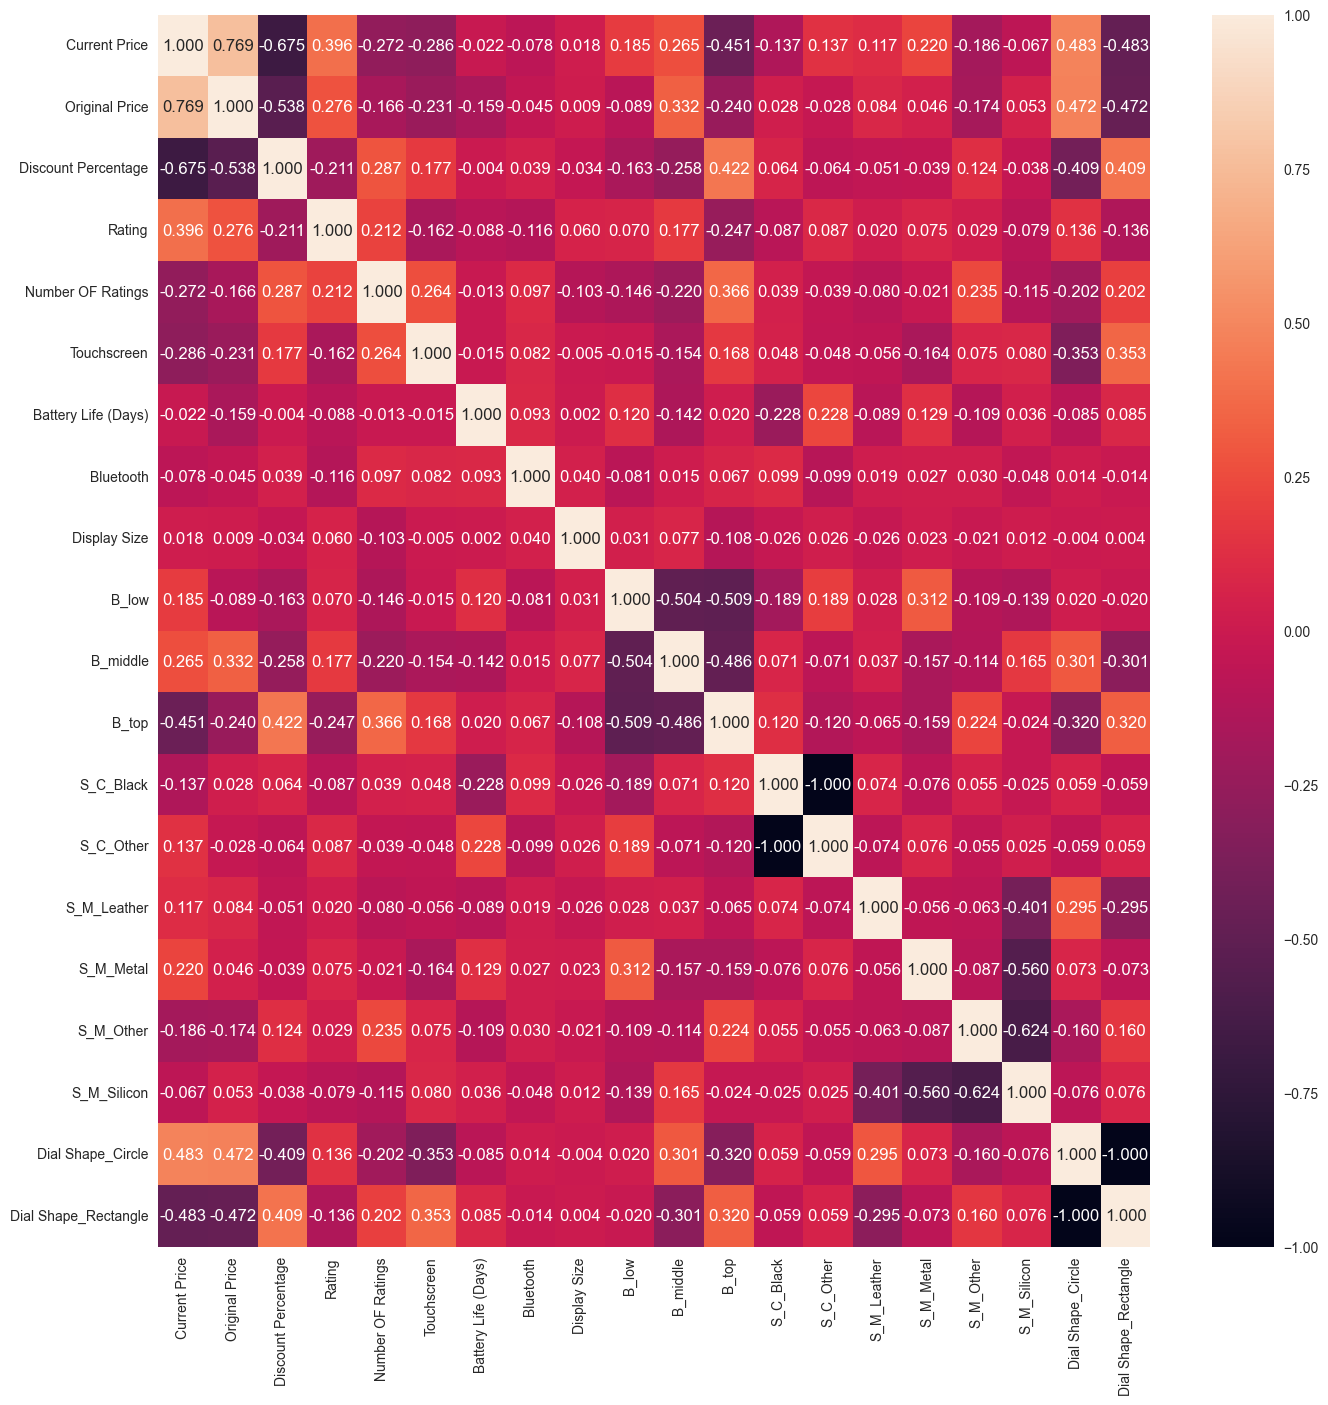

In [37]:
df_corr = data1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,fmt='.3f')
plt.show()

In [38]:
data1 = data1.drop(columns=['Dial Shape_Rectangle', 'S_C_Other'])

## Standardize data

In [39]:
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)
data_std = pd.DataFrame(features_std, columns=data1.columns)

The **Silhouette score** is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

**Calinski and Harabasz score** is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

**Davies-Bouldin score** is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [40]:
result_df = pd.DataFrame({})

Funkcije za prikaz rezultata:

In [41]:

def printResult(y_value, X_value, claster_center):
    unique_labels = np.unique(y_value)
    fig = plt.figure(figsize=(6, 6))
    cmap = plt.cm.get_cmap('plasma')

    for label in unique_labels: 
        color = cmap(label / len(unique_labels))
        plt.scatter(X_value[y_value == label][:, 0], X_value[y_value == label][:, 1], color=color,  label=f'Cluster {label}')
        
    if claster_center is not None: 
        plt.scatter(claster_center[:, 0], claster_center[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def printFeatureImportance(df, pred, centers = None):

    if centers is None:
        cluster_means = df.groupby(pred).mean()
    else: 
        cluster_means = centers

    fig, ax = plt.subplots(figsize=(16, 6))
    cluster_means.T.plot(kind='bar', ax=ax, cmap='plasma')
    plt.title('Feature importance')
    plt.show()

def print3D(Y, X):
    pca = PCA(n_components=3)
    PCA_components = pca.fit_transform(X)
    principalComponents = pd.DataFrame(PCA_components, columns=["f1", "f2", "f3"])

    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
    
    fig.add_trace(go.Scatter3d(
        x=principalComponents["f1"],
        y=principalComponents["f2"],
        z=principalComponents["f3"],
        mode='markers',
        marker=dict(size=5, color=Y, colorscale='plasma'),
        name='Scatter Plot'
    ))
    fig.update_layout(width=700, height=700)
    fig.show()

def getScore (y_value, X_value, alg_name) : 
    calinski = calinski_harabasz_score(X_value, y_value)
    silhouette = silhouette_score(X_value, y_value)
    davies = davies_bouldin_score(X_value, y_value)

    result_df.loc[alg_name, 'calinski_harabasz'] = calinski
    result_df.loc[alg_name, 'Silhouette'] = silhouette
    result_df.loc[alg_name, 'Davies-Bouldin'] = davies
    
    print("calinski_harabasz_score", calinski)
    print("Silhouette score: ", silhouette)
    print("Davies-Bouldin score: ", davies)

### Dendogram

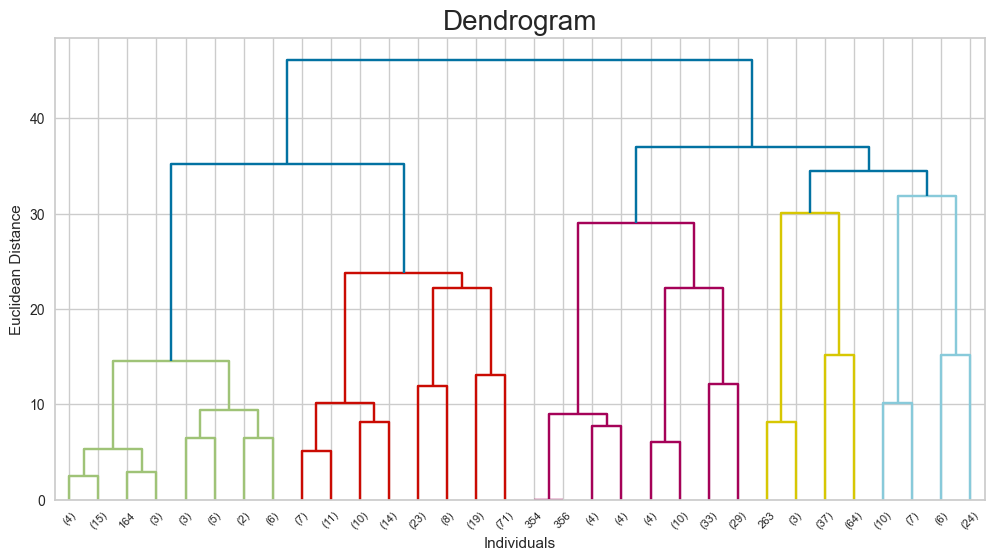

In [42]:
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(features_std, method='ward')

dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='level', p =4)
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

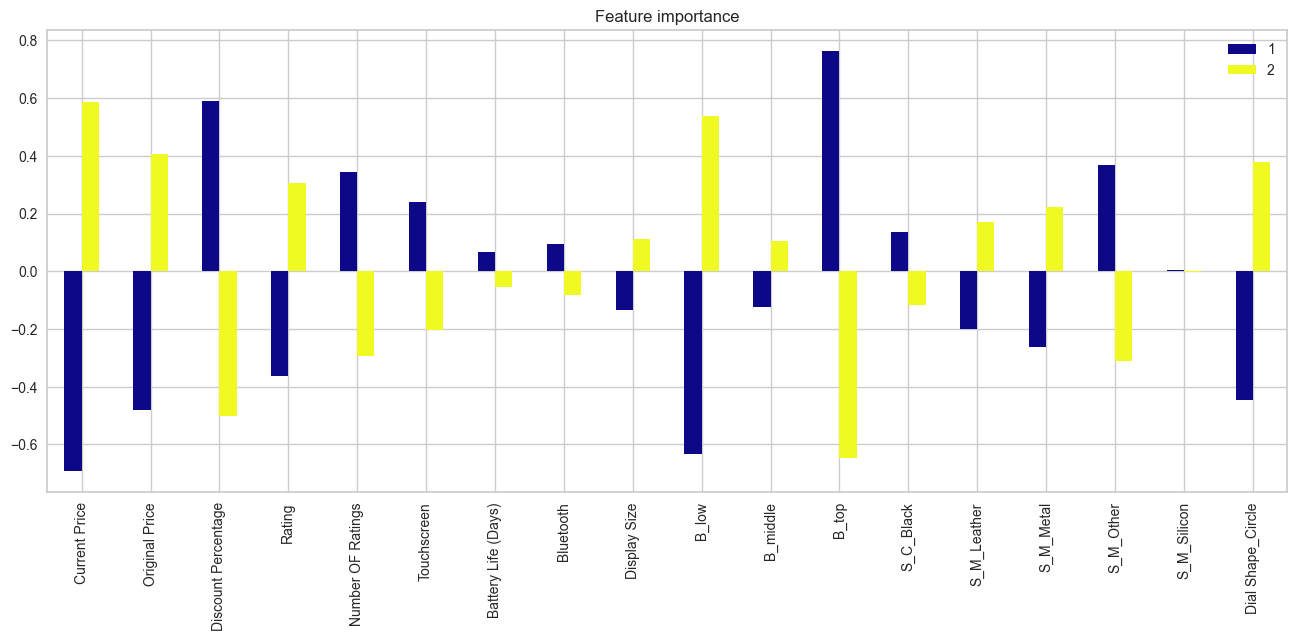

calinski_harabasz_score 68.03806291092339
Silhouette score:  0.14370293111024082
Davies-Bouldin score:  2.331605962802036


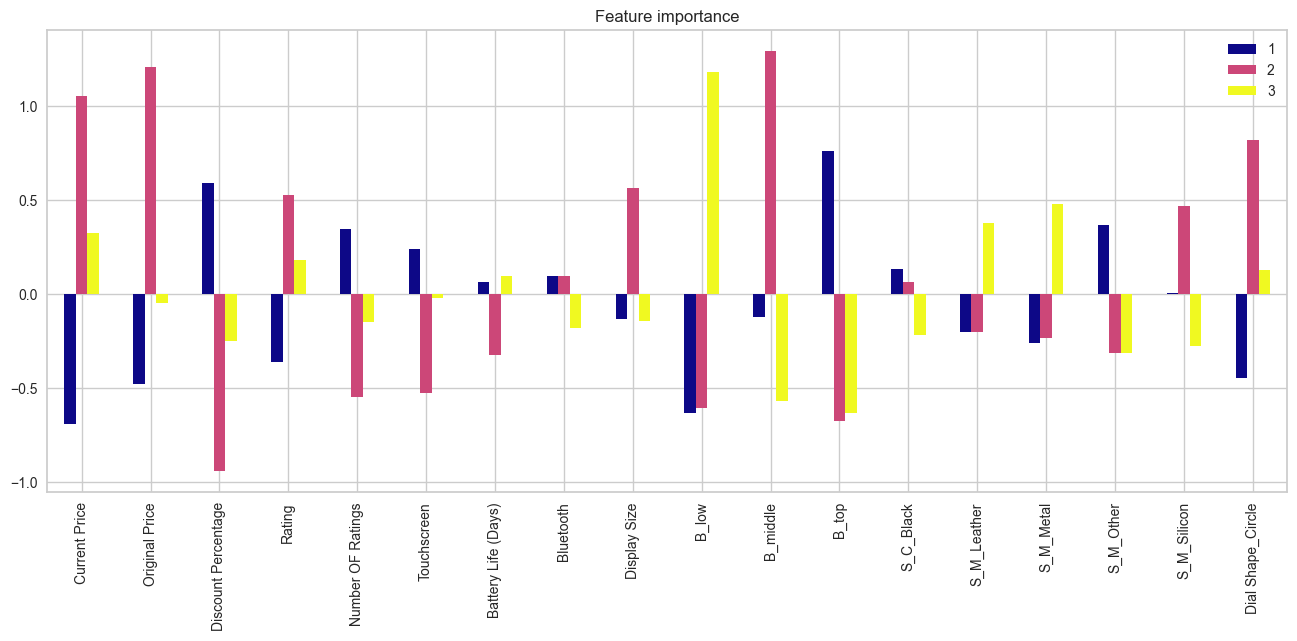

calinski_harabasz_score 61.979237350212934
Silhouette score:  0.1771757468227325
Davies-Bouldin score:  2.1669940463853874


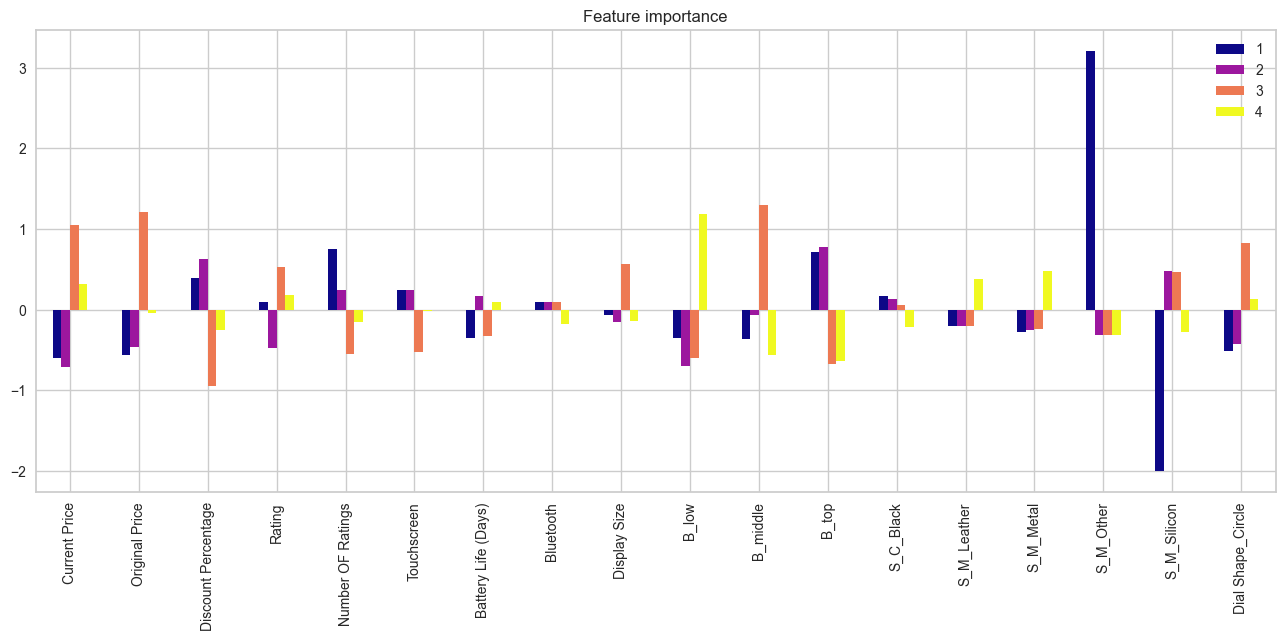

calinski_harabasz_score 62.070777823050854
Silhouette score:  0.20016127498947256
Davies-Bouldin score:  1.8627128025065183


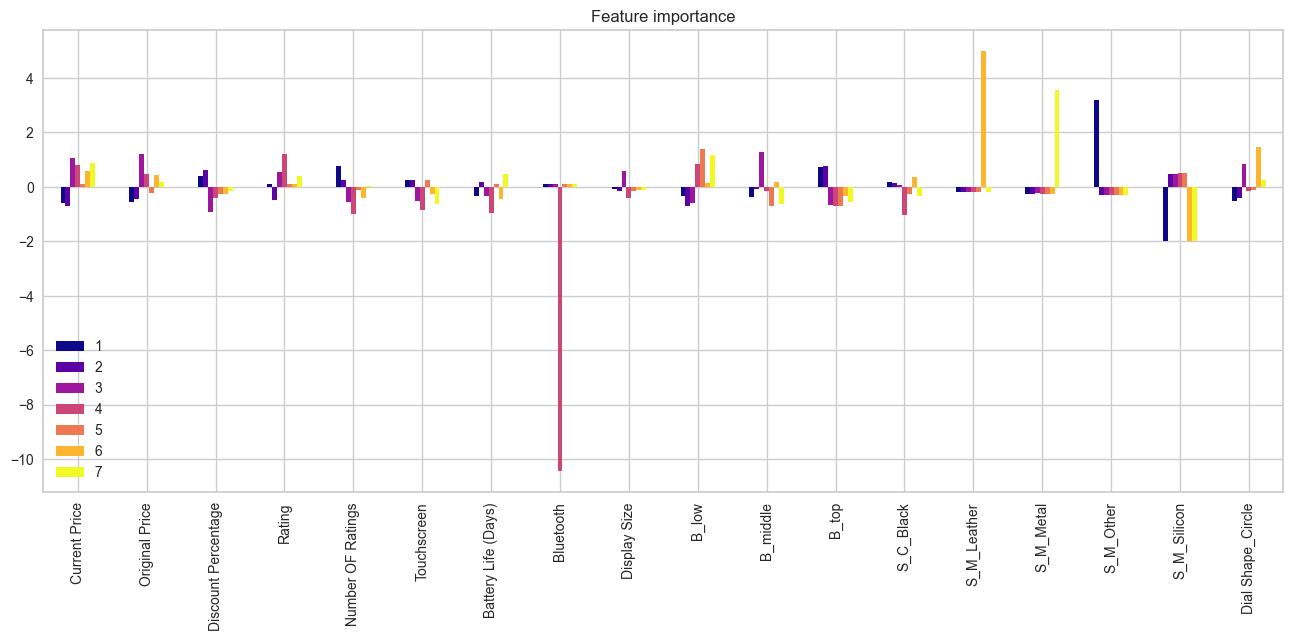

calinski_harabasz_score 70.96293259602037
Silhouette score:  0.24003721358850466
Davies-Bouldin score:  1.2855327025031333


In [43]:
for cut_height in [40, 37, 35, 30]:
    clusters = sch.fcluster(linkage_matrix, cut_height, criterion='distance')
    print3D( clusters, data_std)
    printFeatureImportance(data_std, clusters)
    getScore(clusters, data_std, f"Hierarchical Clustering {cut_height}")
 

## Primena algoritama


### Standard Data

#### KMeans

##### Elbow Method

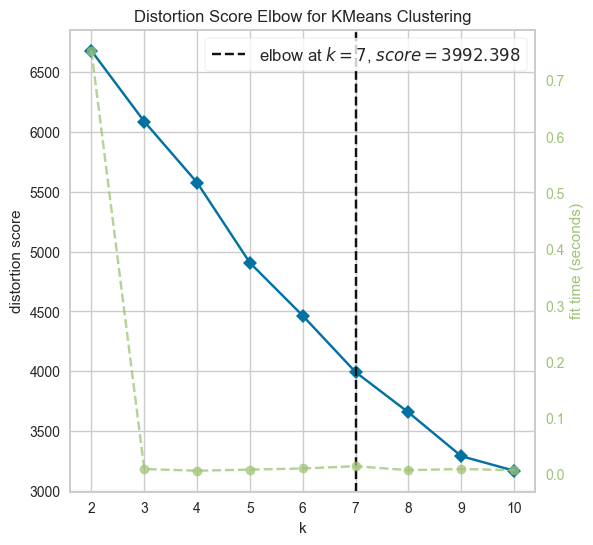

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
plt.figure(figsize=(6, 6))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(features_std)
Elbow_M.show()


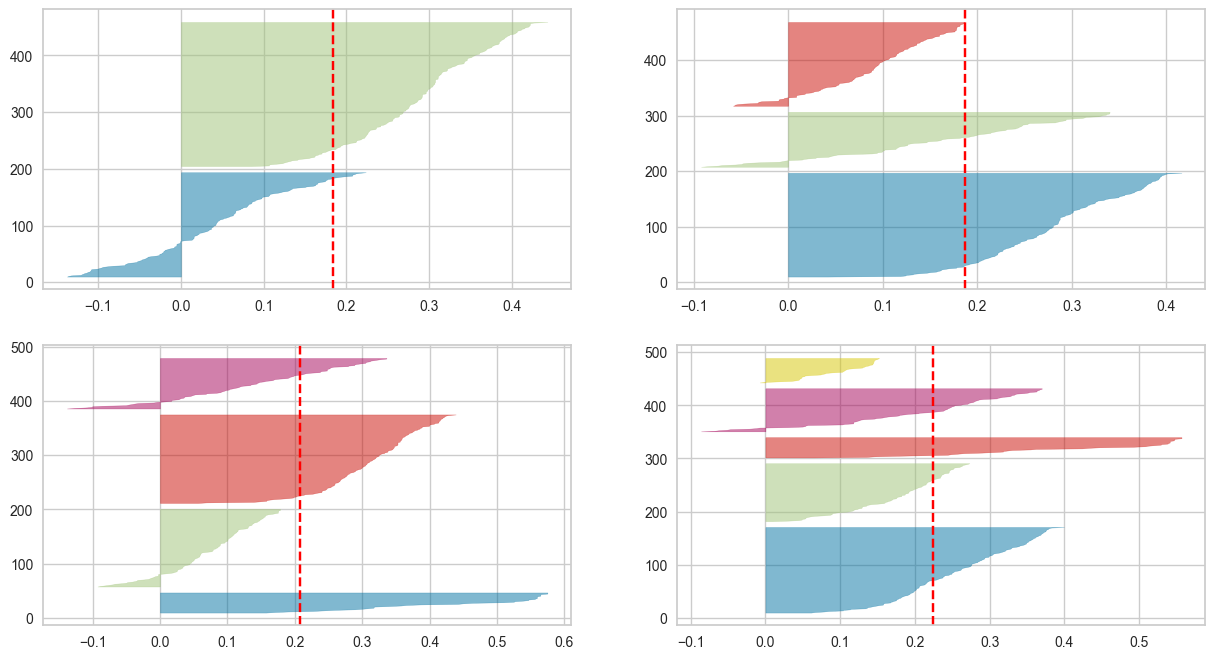

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]: 
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_std)

2 3 4 5 6 7 8 9 

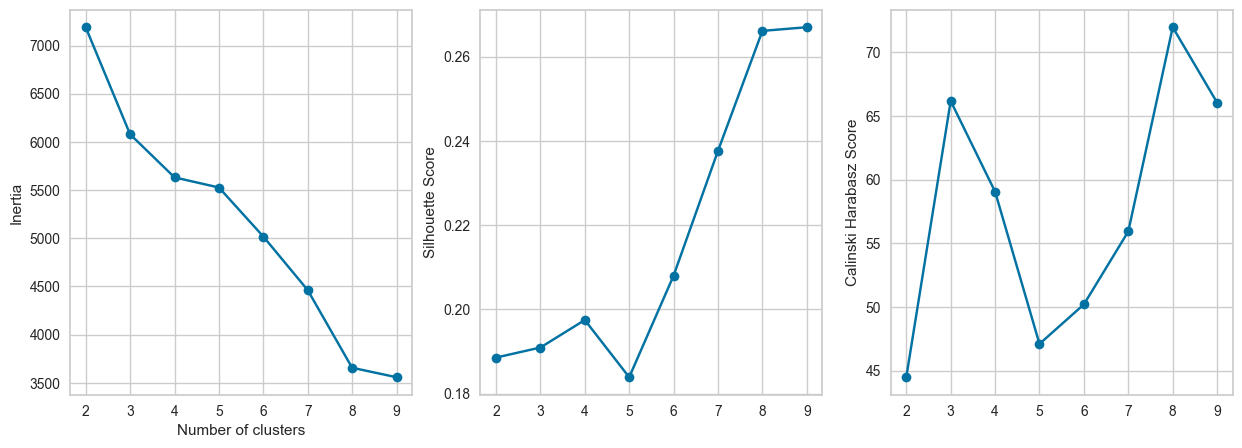

In [83]:
k_range = range(2, 10)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_std)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(features_std, kmeans.labels_, sample_size=10000))
    calinski.append(calinski_harabasz_score(features_std, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

calinski_harabasz_score 66.89072715650747
Silhouette score:  0.2071729516897104
Davies-Bouldin score:  1.7588831856715228


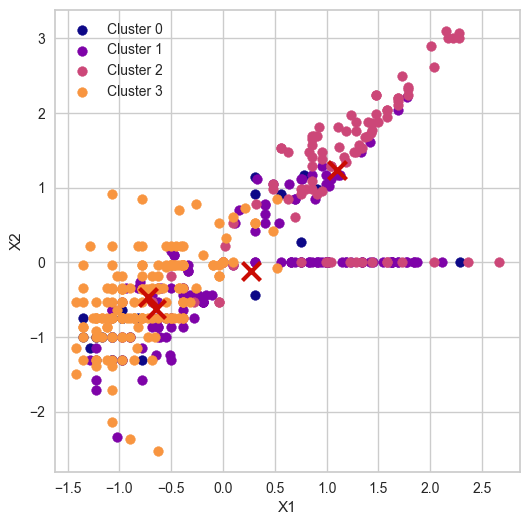

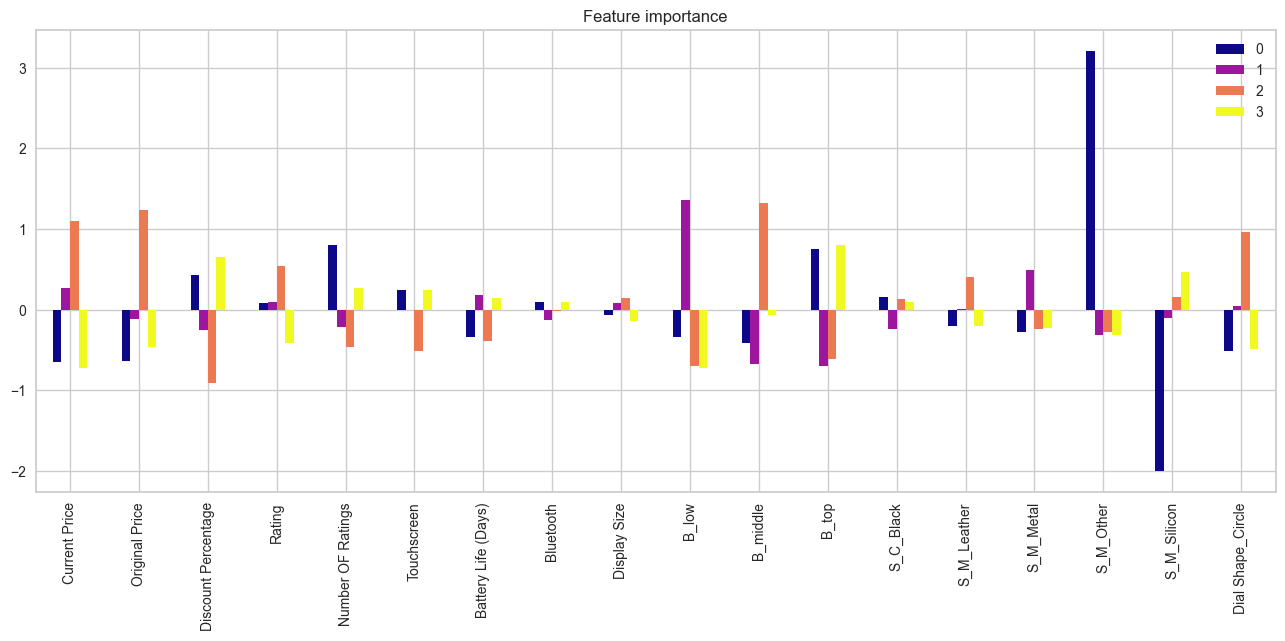

In [46]:
kmeans = KMeans(n_clusters=4, n_init=50, init='k-means++', max_iter=500).fit(features_std)

pred_kmeans = kmeans.predict(features_std)

claster_center_kmeans = kmeans.cluster_centers_

getScore(pred_kmeans, features_std, "KMeans")
printResult(pred_kmeans, features_std, claster_center_kmeans)
print3D(pred_kmeans, features_std)
printFeatureImportance(data_std, pred_kmeans)


#### MeanShift


calinski_harabasz_score 18.04122581877313
Silhouette score:  0.3180516795789224
Davies-Bouldin score:  0.7459528994732086


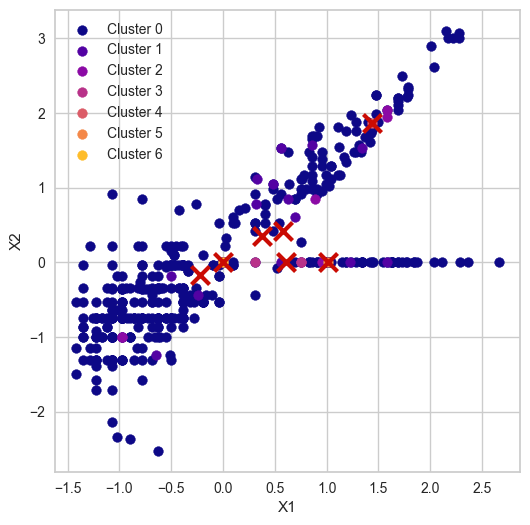

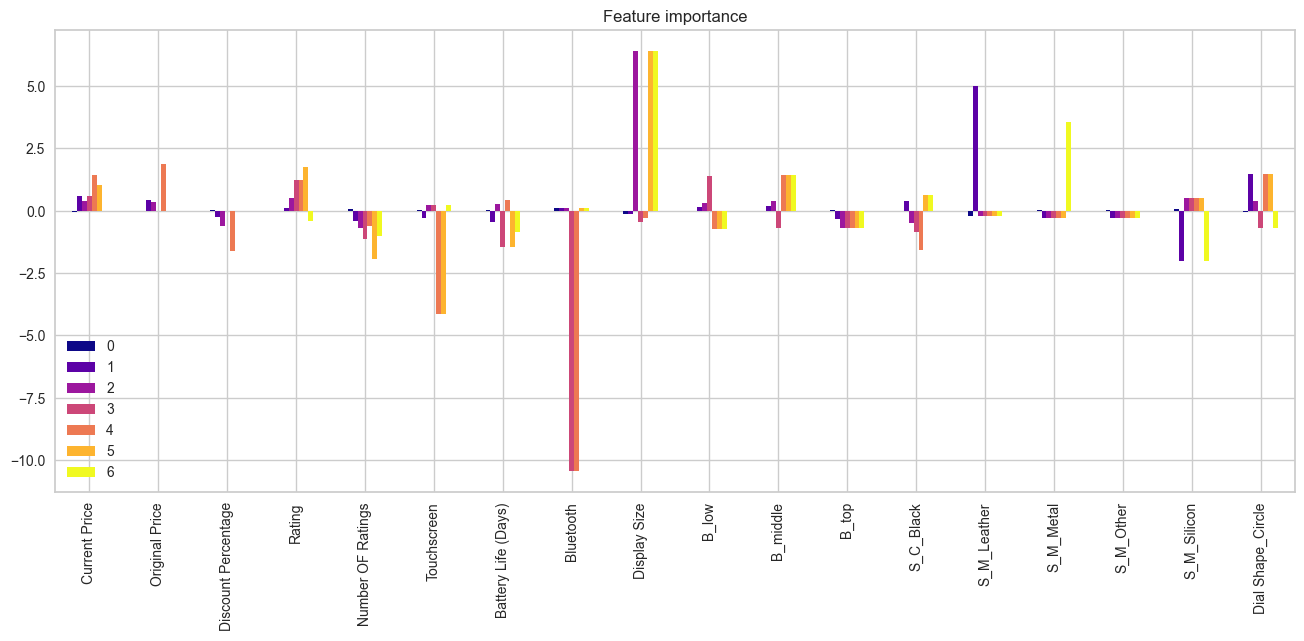

In [47]:
mean_shift = MeanShift().fit(features_std)

pred_means = mean_shift.predict(features_std)

claster_center_mean_s = mean_shift.cluster_centers_

getScore(pred_means, features_std, "MeanShift")
printResult(pred_means, features_std, claster_center_mean_s)
print3D(pred_means, features_std)

printFeatureImportance(data_std, pred_means)



#### DBSCAN

calinski_harabasz_score 8.885954810829642
Silhouette score:  -0.12496721284875642
Davies-Bouldin score:  0.9945808609797082


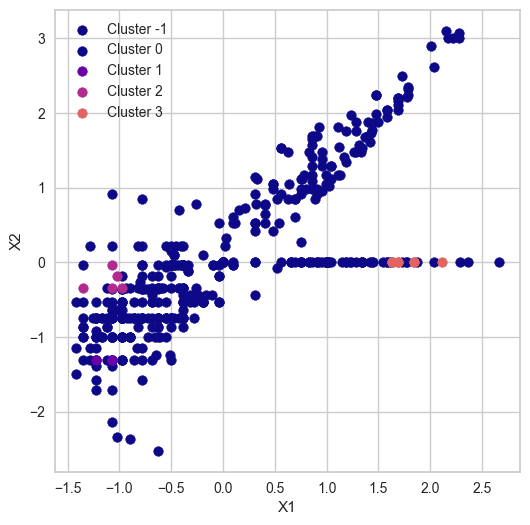

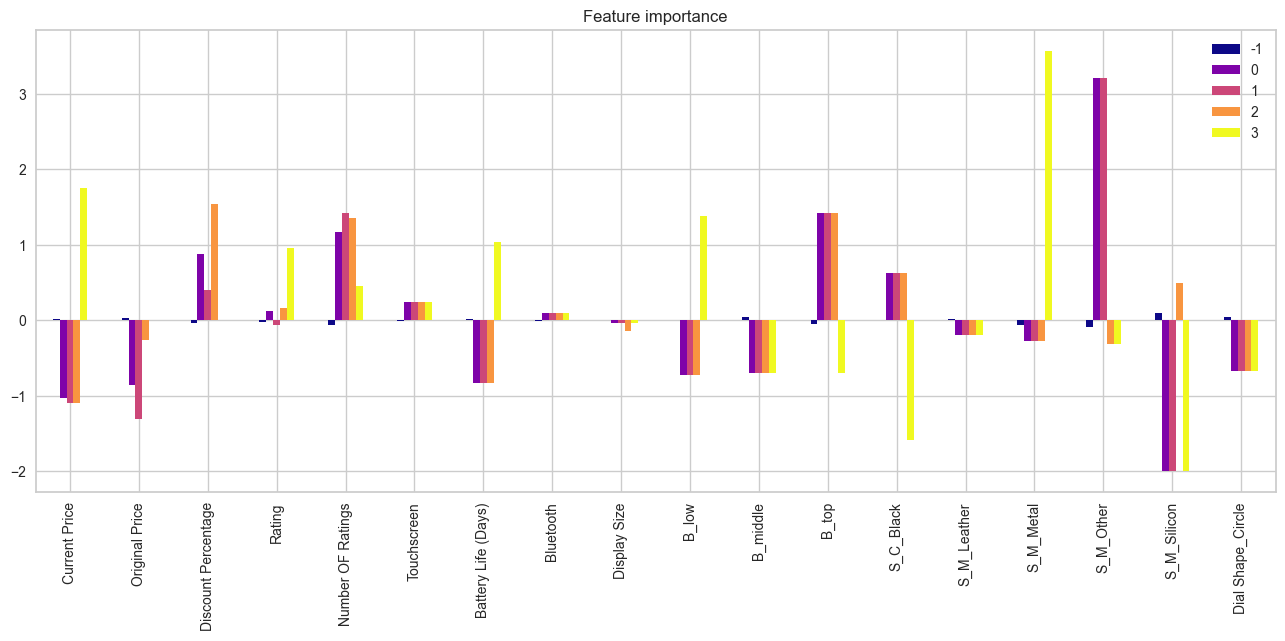

In [48]:
dbscan_optimal = DBSCAN()
pred_dbscan = dbscan_optimal.fit_predict(features_std)

getScore(pred_dbscan, features_std, "DBSCAN")
printResult(pred_dbscan, features_std, None)
print3D(pred_dbscan, features_std)

printFeatureImportance(data_std, pred_dbscan)

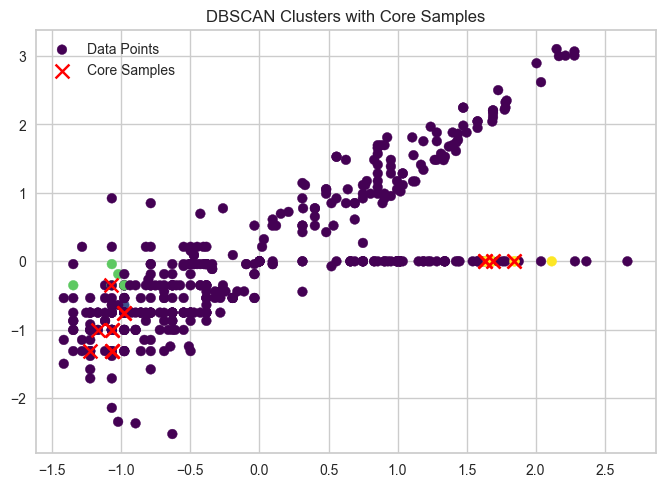

In [49]:
core_samples_mask = np.zeros_like(pred_dbscan, dtype=bool)
core_samples_mask[dbscan_optimal.core_sample_indices_] = True

core_samples = features_std[core_samples_mask]

plt.scatter(features_std[:, 0], features_std[:, 1], c=pred_dbscan, cmap='viridis', marker='o', label='Data Points')
plt.scatter(core_samples[:, 0], core_samples[:, 1], c='red', marker='x', s=100, label='Core Samples')
plt.title('DBSCAN Clusters with Core Samples')
plt.legend()
plt.show()

#### Agglomerative clustering

Elbow Method to determine the number of clusters to be formed:


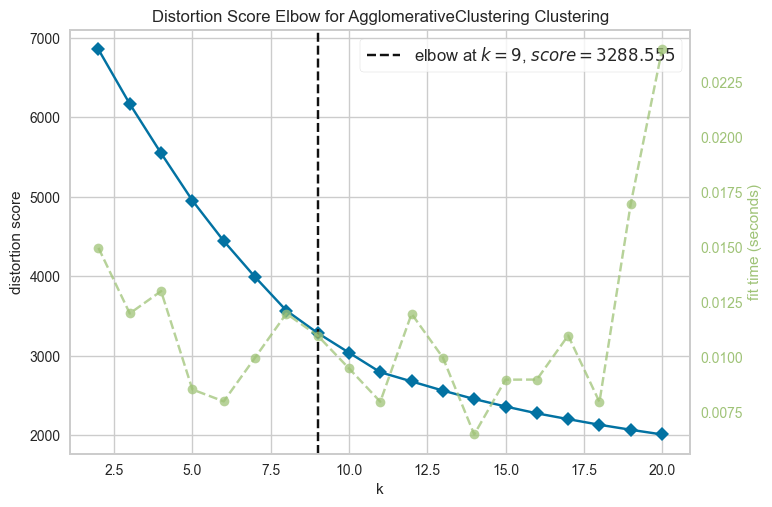

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(features_std)
Elbow_M.show()

calinski_harabasz_score 62.07077782305087
Silhouette score:  0.20016127498947256
Davies-Bouldin score:  1.8627128025065183


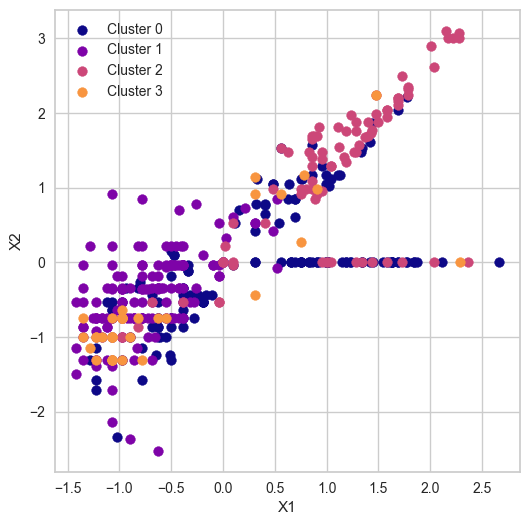

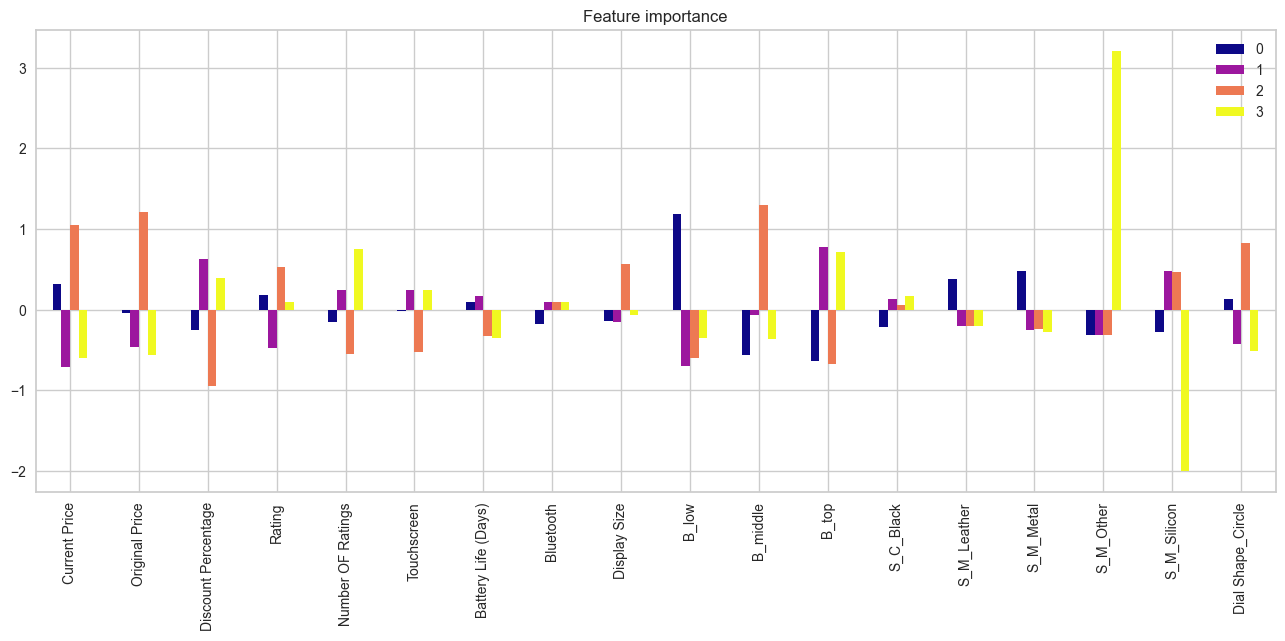

In [51]:
ac_model = AgglomerativeClustering(n_clusters=4, compute_distances=True)
ac_pred = ac_model.fit_predict(features_std)

getScore(ac_pred, features_std, "Agglomerative")
printResult(ac_pred, features_std, None)
print3D(ac_pred, features_std)

printFeatureImportance(data_std, ac_pred)

calinski_harabasz_score 65.07618049144945
Silhouette score:  0.215468799831482
Davies-Bouldin score:  1.6538354871756955


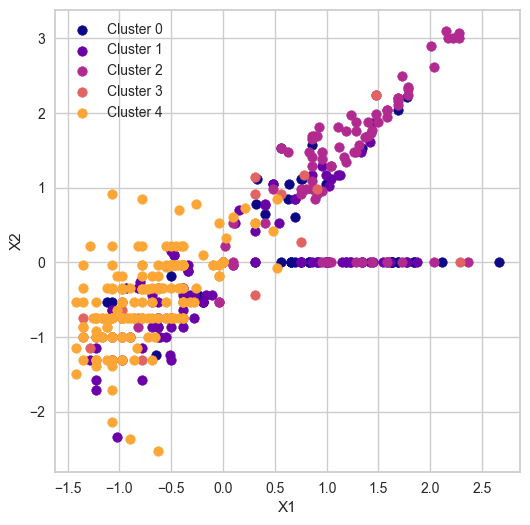

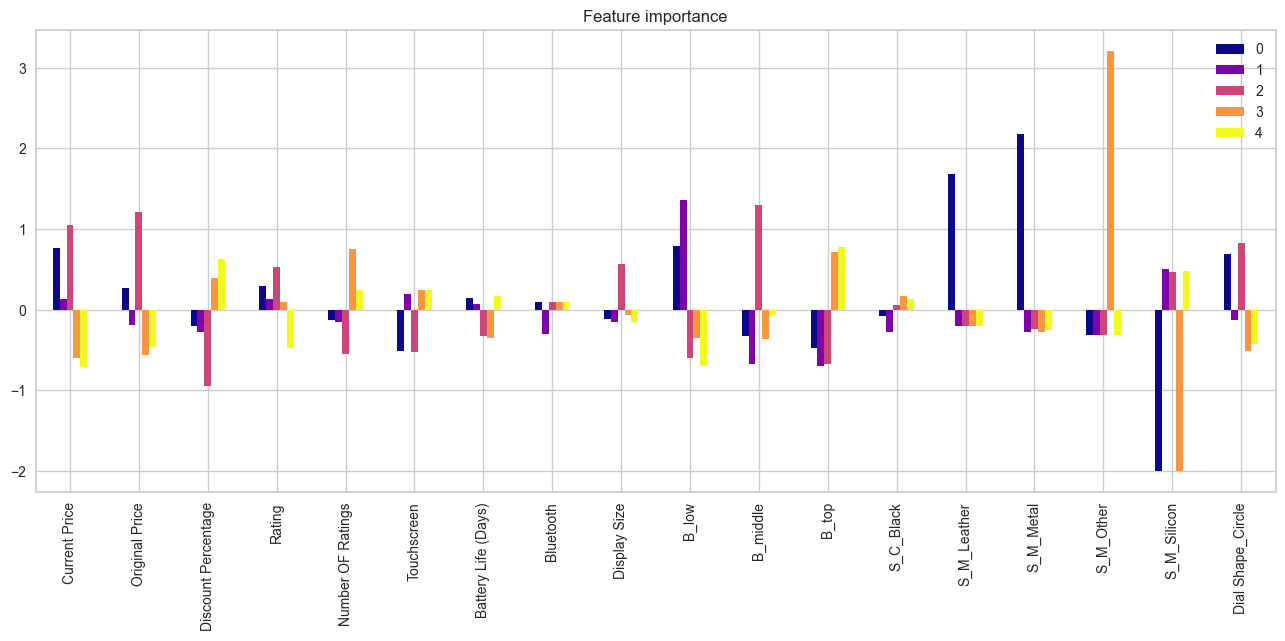

In [52]:
ac_model = AgglomerativeClustering(n_clusters=5, compute_distances=True)
ac_pred = ac_model.fit_predict(features_std)

getScore(ac_pred, features_std, "Agglomerative")
printResult(ac_pred, features_std, None)
print3D(ac_pred, features_std)
printFeatureImportance(data_std, ac_pred)

In [53]:
data.columns

Index(['Current Price', 'Original Price', 'Discount Percentage', 'Rating',
       'Number OF Ratings', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'B_low', 'B_middle', 'B_top', 'S_C_Black', 'S_C_Other',
       'S_M_Leather', 'S_M_Metal', 'S_M_Other', 'S_M_Silicon',
       'Dial Shape_Circle', 'Dial Shape_Rectangle'],
      dtype='object')

#### Gaussian mixture

3
4
calinski_harabasz_score 46.446068060228235
Silhouette score:  0.13690342169888706
Davies-Bouldin score:  2.2564697223242574


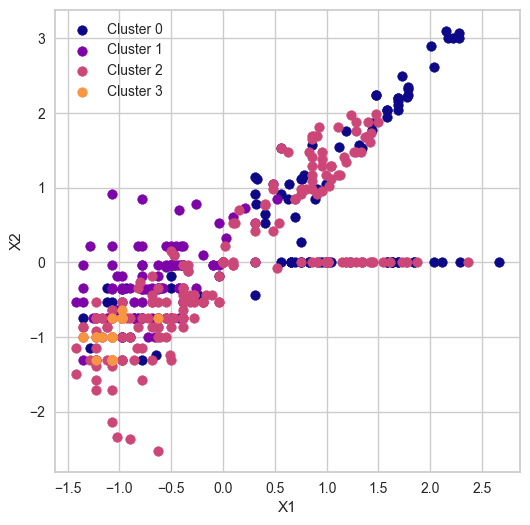

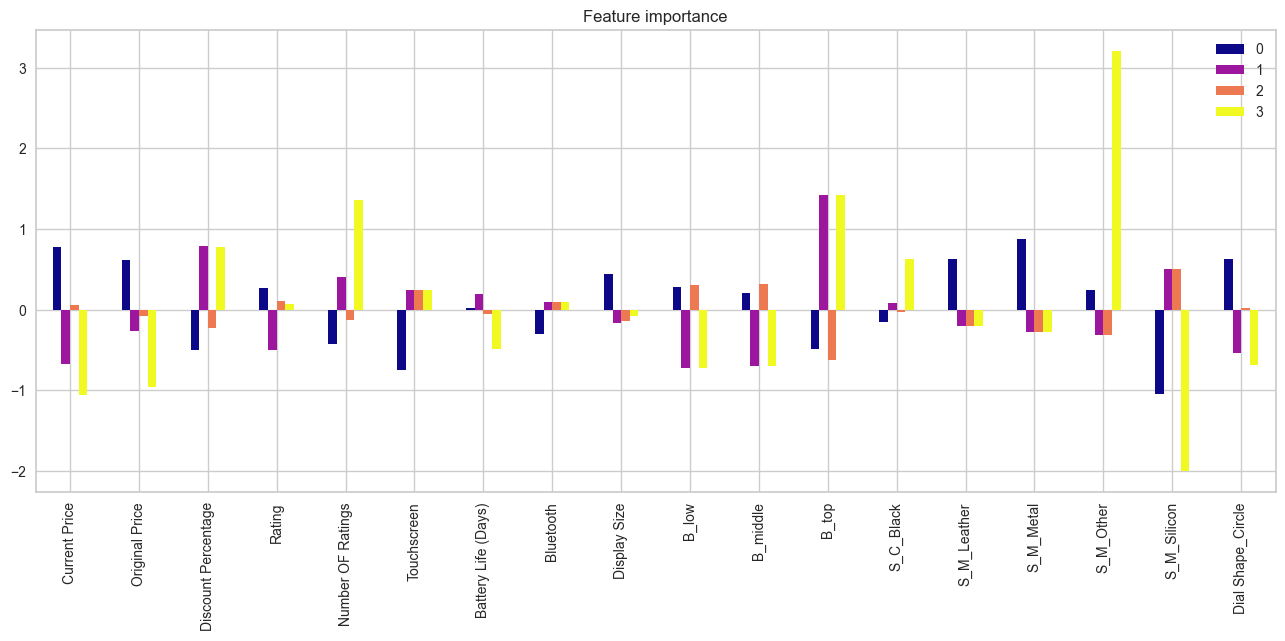

In [54]:

best_gmm = None
best_gmm_labels = None
n_components_range = range(3, 5)  

X_gaus = features_std

for k in n_components_range:
    gm_model = GaussianMixture(n_components=k, covariance_type='spherical')
    gm_model.fit(features_std)
    gm_labels = gm_model.predict(features_std)

    if best_gmm is None or gm_model.bic(features_std) < best_gmm.bic(features_std):
        best_gmm = gm_model
        best_gmm_labels = gm_labels
        print(k)


getScore(best_gmm_labels, features_std, "Gaussian Mixture")
printResult(best_gmm_labels, features_std, None)
print3D(best_gmm_labels, features_std)
printFeatureImportance(data_std, best_gmm_labels)


#### Spectar clustering


calinski_harabasz_score 60.164524766085165
Silhouette score:  0.23052912099355127
Davies-Bouldin score:  1.6557751506528477


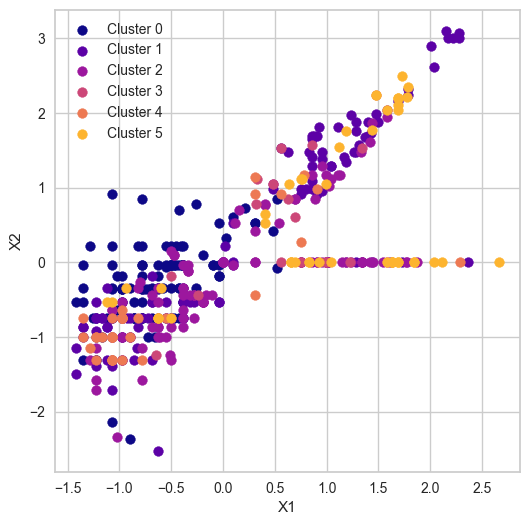

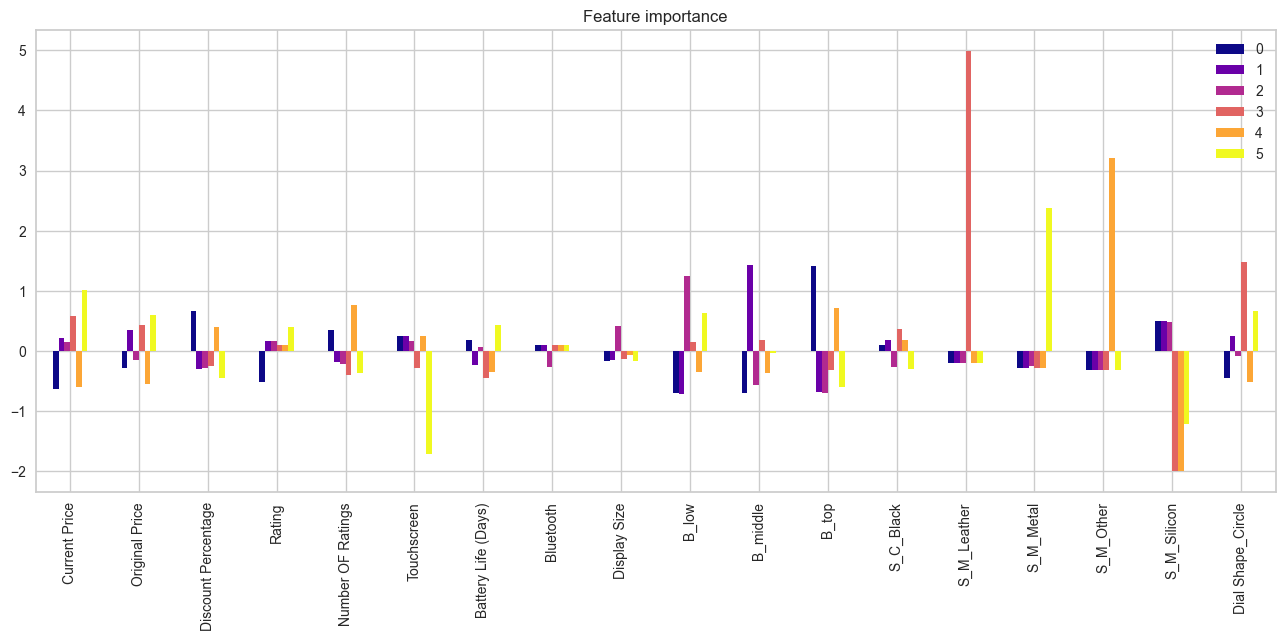

In [55]:

n_clusters = 6 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(features_std)

getScore(labels, features_std, "Spectar clustering")
printResult(labels, features_std, None)
print3D(labels, features_std)
printFeatureImportance(data_std, labels)

### Data reduction with PCA

In [56]:
pca = PCA(n_components=3, random_state=80)
pca.fit(features_std)
data_pca = pd.DataFrame(pca.transform(features_std), columns=(["f1","f2", "f3"]))
pca.explained_variance_ratio_.cumsum()


array([0.21041948, 0.32841411, 0.43124546])

#### KMeans

Elbow Method to determine the number of clusters to be formed:


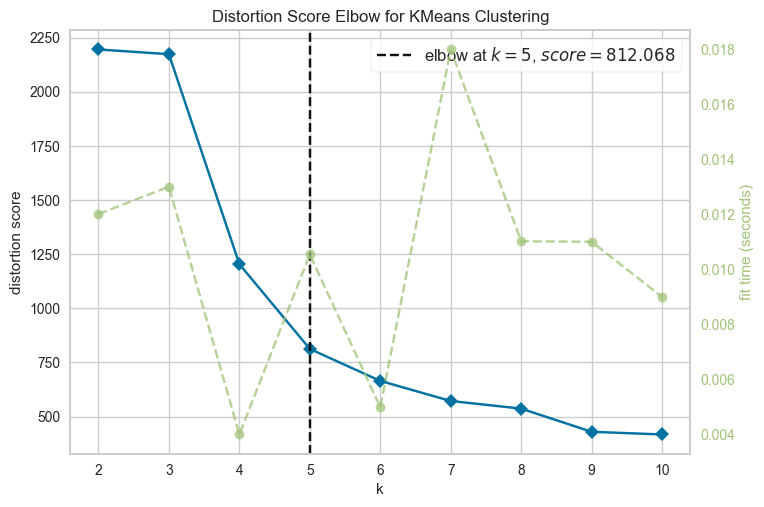

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

calinski_harabasz_score 349.53637088421794
Silhouette score:  0.4559300716902257
Davies-Bouldin score:  0.7620520918250666


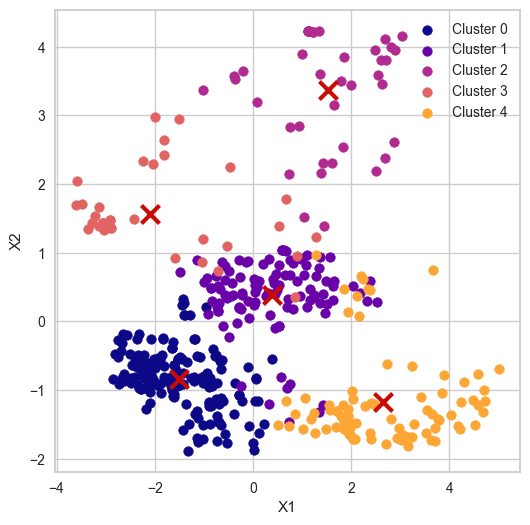

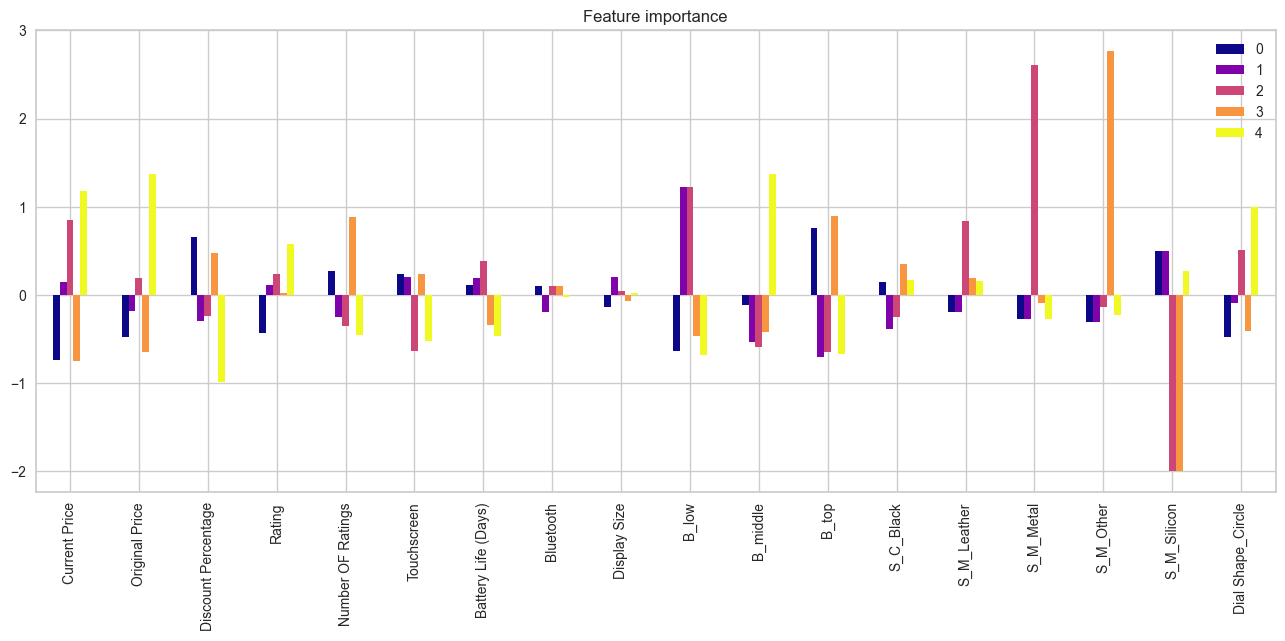

In [58]:
kmeans_pca = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca)
pred_kmeans_pca = kmeans_pca.predict(data_pca)
claster_center_kmeans_pca = kmeans_pca.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca, data_pca, "PCA KMeans")
printResult(pred_kmeans_pca, data_pca.values, claster_center_kmeans_pca )
print3D(pred_kmeans_pca, data_pca)
printFeatureImportance(data_std, pred_kmeans_pca)

#### DBSCAN

calinski_harabasz_score 79.24298091443133
Silhouette score:  0.09056044565634186
Davies-Bouldin score:  1.144664956917482


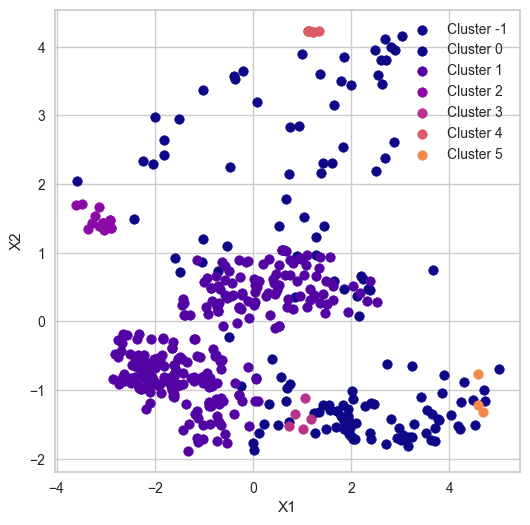

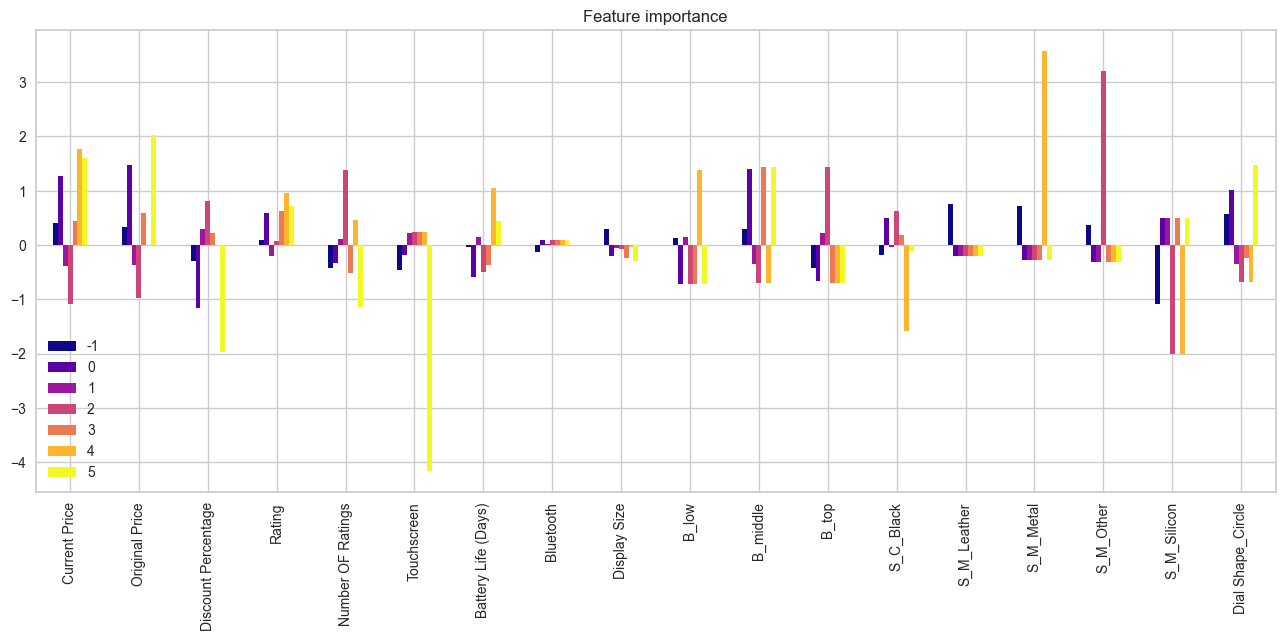

In [59]:
dbscan_optimal_pca = DBSCAN()
pred_dbscan_pca = dbscan_optimal_pca.fit_predict(data_pca)

getScore(pred_dbscan_pca, data_pca, "PCA DBSCAN")
printResult(pred_dbscan_pca, data_pca.values, None )
print3D(pred_dbscan_pca, data_pca)
printFeatureImportance(data_std, pred_dbscan_pca)


#### Agglomerative

Elbow Method to determine the number of clusters to be formed:


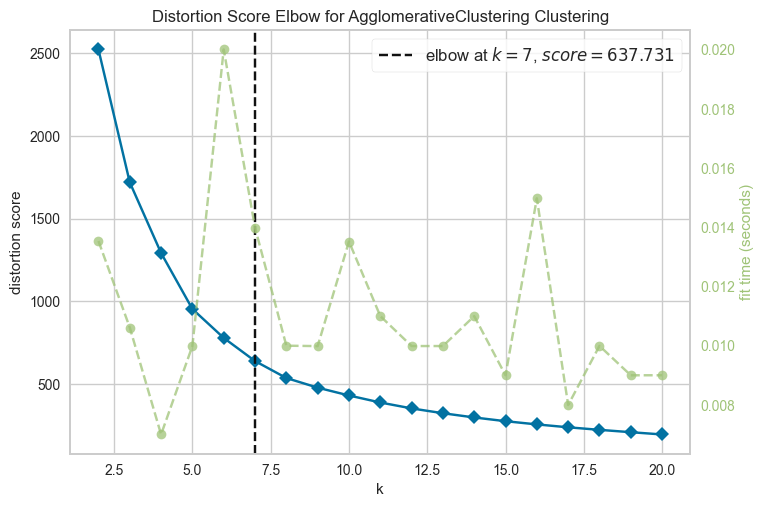

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(data_pca)
Elbow_M.show()


calinski_harabasz_score 238.96635663595146
Silhouette score:  0.4373428611047548
Davies-Bouldin score:  0.8320824125894676


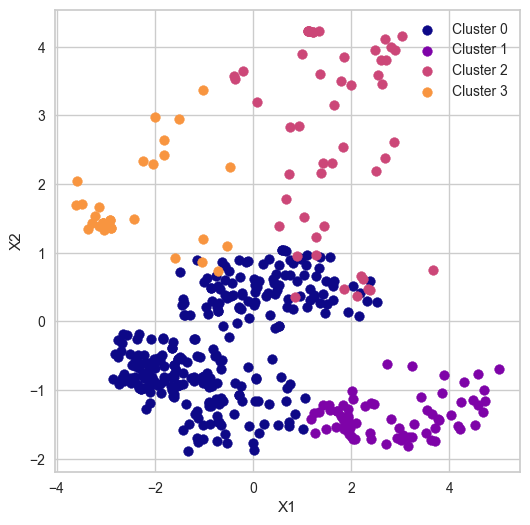

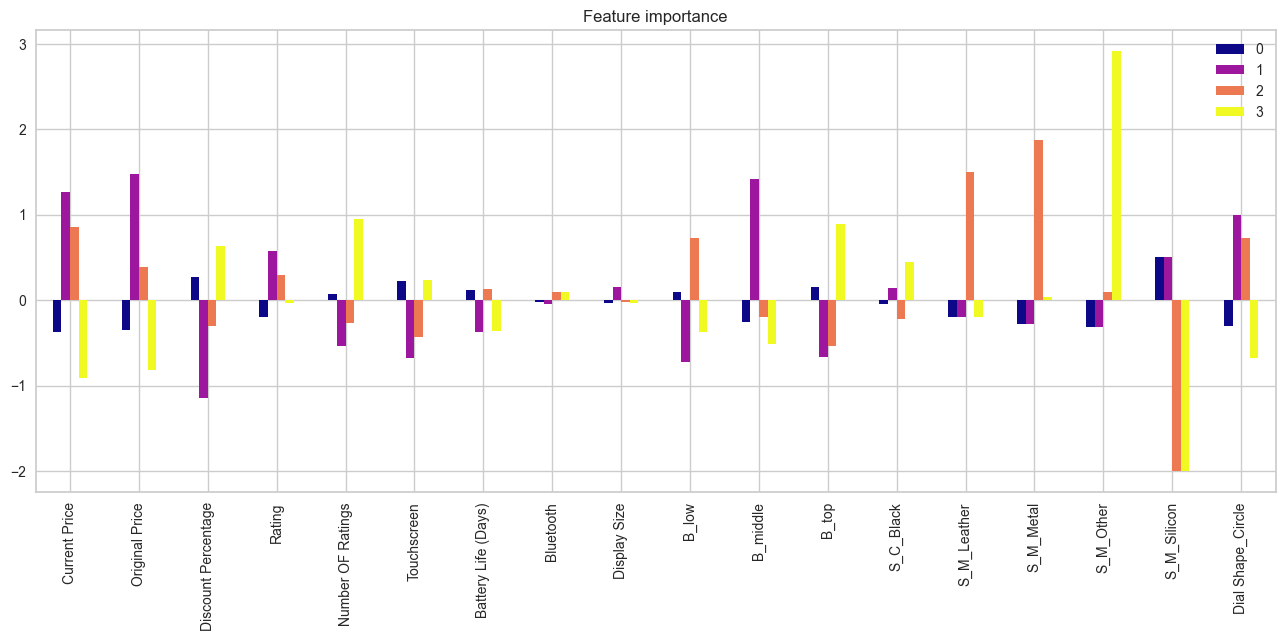

In [61]:
ac_model_pca = AgglomerativeClustering(n_clusters=4, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

getScore(ac_pred_pca, data_pca, "PCA Agglomerative")
printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)
printFeatureImportance(data_std, ac_pred_pca)

calinski_harabasz_score 314.3327389871232
Silhouette score:  0.37029473178399736
Davies-Bouldin score:  0.8820757038191595


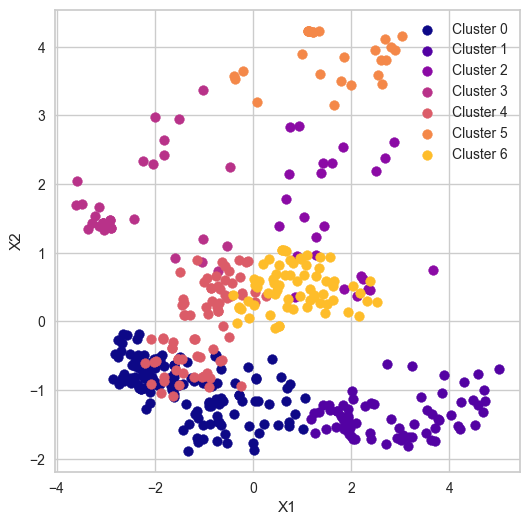

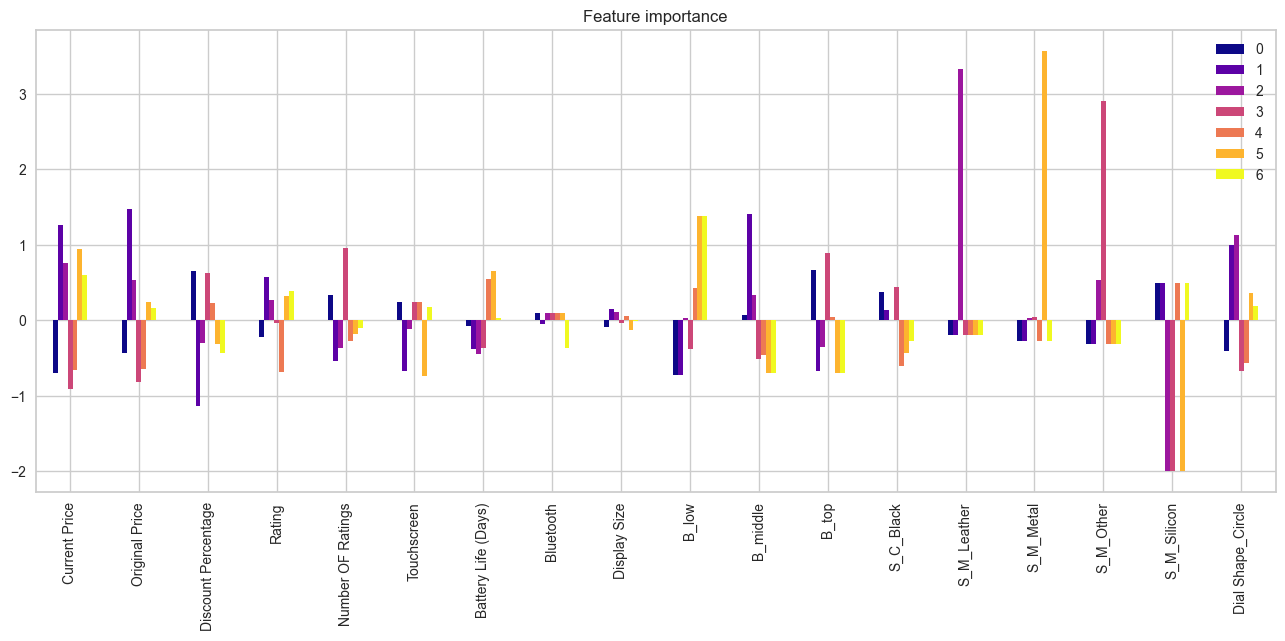

In [62]:
ac_model_pca = AgglomerativeClustering(n_clusters=7, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

getScore(ac_pred_pca, data_pca, "PCA Agglomerative")
printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)
printFeatureImportance(data_std, ac_pred_pca)


#### Gaussian mixture

calinski_harabasz_score 280.1435397782661
Silhouette score:  0.4210398612216374
Davies-Bouldin score:  0.8601696387554771


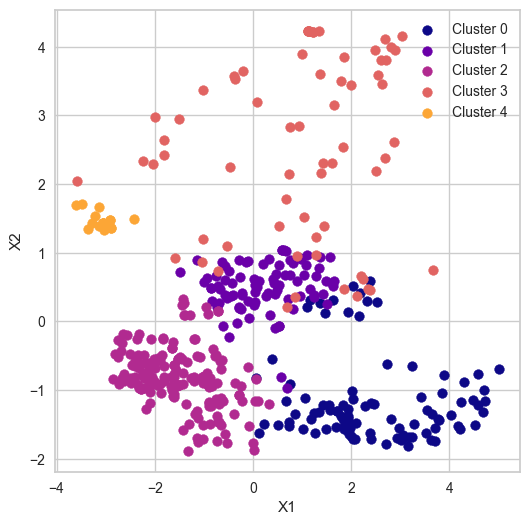

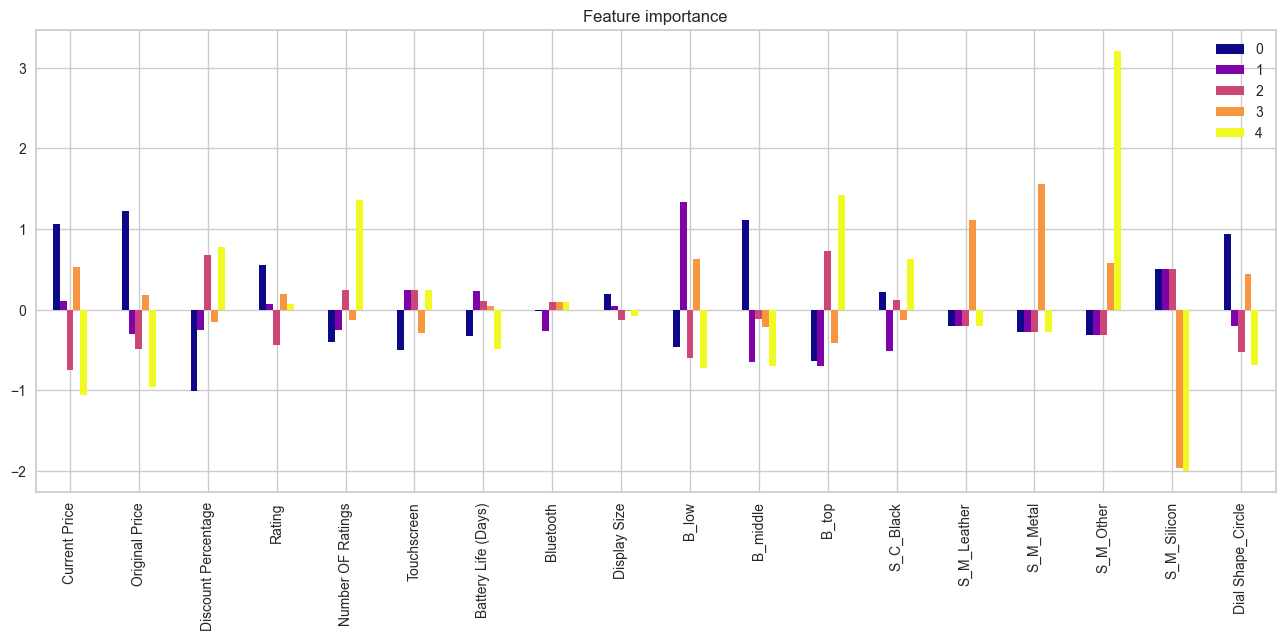

In [63]:

gm_model = GaussianMixture(n_components=5, covariance_type='spherical')
gm_model.fit(data_pca)
gm_labels = gm_model.predict(data_pca)

getScore(gm_labels, data_pca, "PCA Gaussian Mixture")
printResult(gm_labels, data_pca.values, None)
print3D(gm_labels, data_pca)
printFeatureImportance(data_std, gm_labels)


#### Spectral Clustering

calinski_harabasz_score 82.87852947147184
Silhouette score:  0.22701138247120656
Davies-Bouldin score:  1.4050785779888588


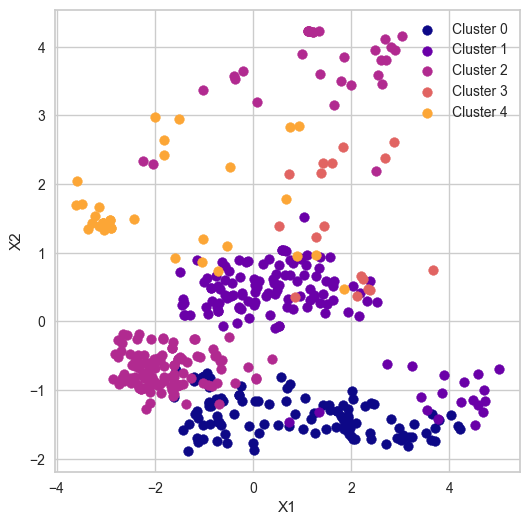

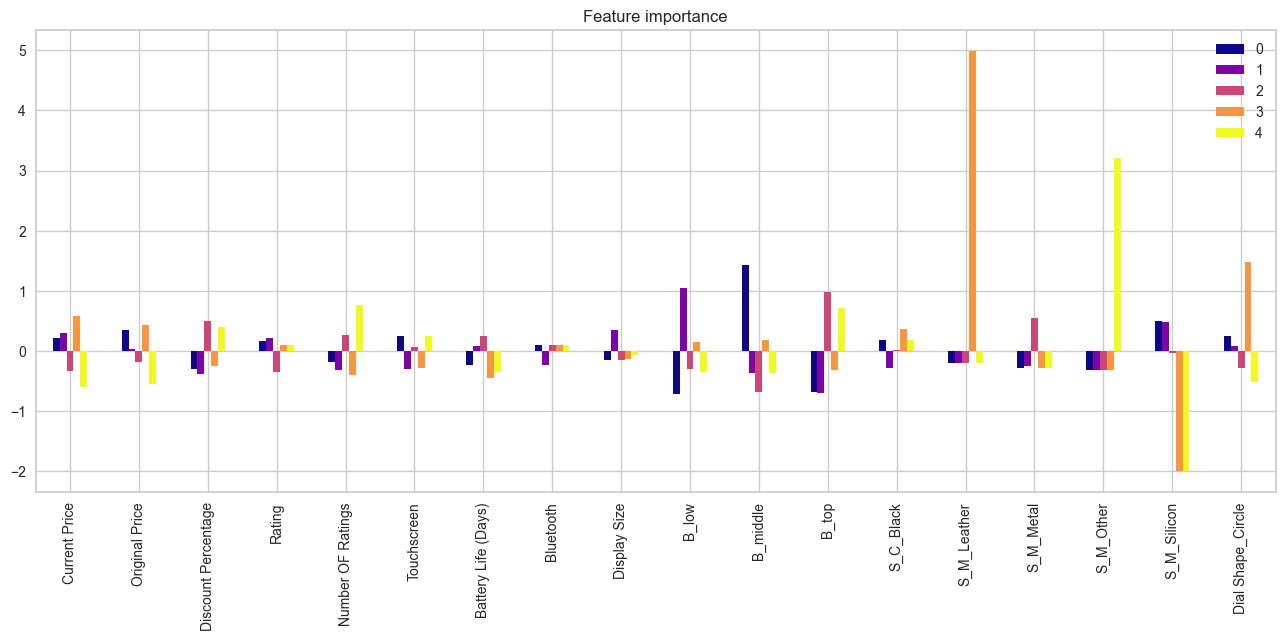

In [64]:

n_clusters = 5 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(features_std)

getScore(labels, data_pca, "PCA Spectar clustering")
printResult(labels, data_pca.values, None)
print3D(labels, data_pca)
printFeatureImportance(data_std, labels)


### PCA sa 4 komponente

In [65]:
pca4 = PCA(n_components=4, random_state=80)
pca4.fit(features_std)
data_pca4 = pd.DataFrame(pca4.transform(features_std), columns=(["f1","f2", "f3", "f4"]))
pca4.explained_variance_ratio_.cumsum()

array([0.21041948, 0.32841411, 0.43124546, 0.50549057])

#### KMeans

calinski_harabasz_score 212.5705777725661
Silhouette score:  0.3678155298064117
Davies-Bouldin score:  0.9997064134386056


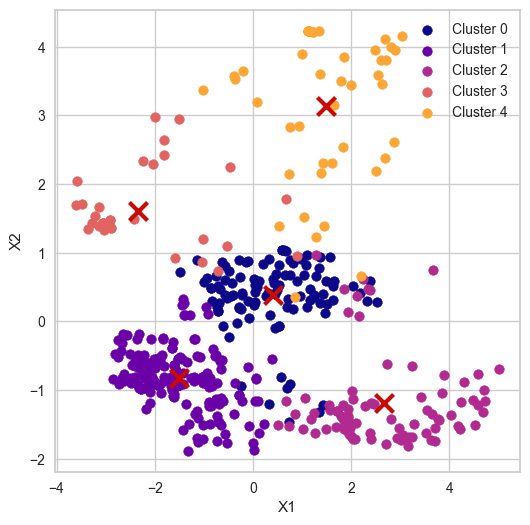

In [66]:
kmeans_pca4 = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca4)
pred_kmeans_pca4 = kmeans_pca4.predict(data_pca4)
claster_center_kmeans_pca4 = kmeans_pca4.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca4, data_pca4, "PCA 4 KMeans")
printResult(pred_kmeans_pca4, data_pca4.values,claster_center_kmeans_pca4 )
print3D(pred_kmeans_pca4, data_pca4)


#### DBSCAN

calinski_harabasz_score 19.92637011679814
Silhouette score:  -0.10317510348157191
Davies-Bouldin score:  1.2980494166290288


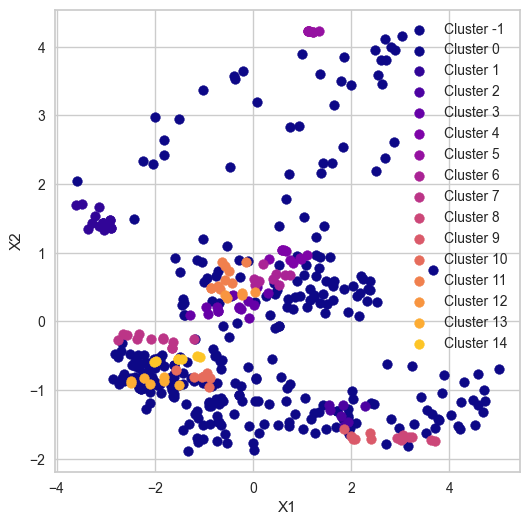

In [67]:
dbscan_optimal_pca4 = DBSCAN()
pred_dbscan_pca4 = dbscan_optimal_pca4.fit_predict(data_pca4)

getScore(pred_dbscan_pca4, data_pca4, "PCA 4 DBSCAN")
printResult(pred_dbscan_pca4, data_pca4.values, None )
print3D(pred_dbscan_pca4, data_pca4)

#### Agglomerative

calinski_harabasz_score 177.05638674025982
Silhouette score:  0.3438249765962682
Davies-Bouldin score:  0.95461876218444


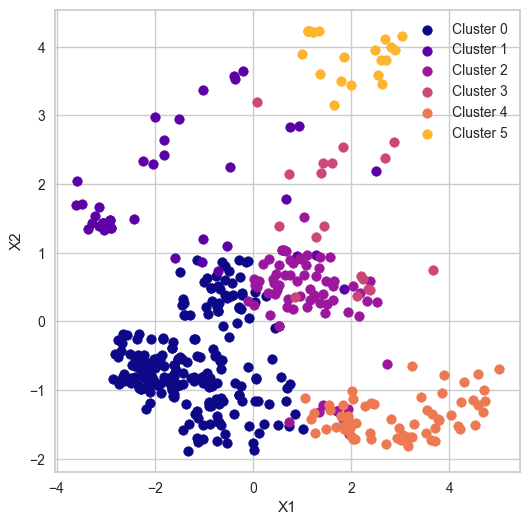

In [68]:
ac_model_pca4 = AgglomerativeClustering(n_clusters=6, compute_distances=True)
ac_pred_pca4 = ac_model_pca4.fit_predict(data_pca4)

getScore(ac_pred_pca4, data_pca4, "PCA 4 Agglomerative")
printResult(ac_pred_pca4, data_pca4.values, None )
print3D(ac_pred_pca4, data_pca4)


### Redukcija ficera


raspoela po klasterima za kmeans

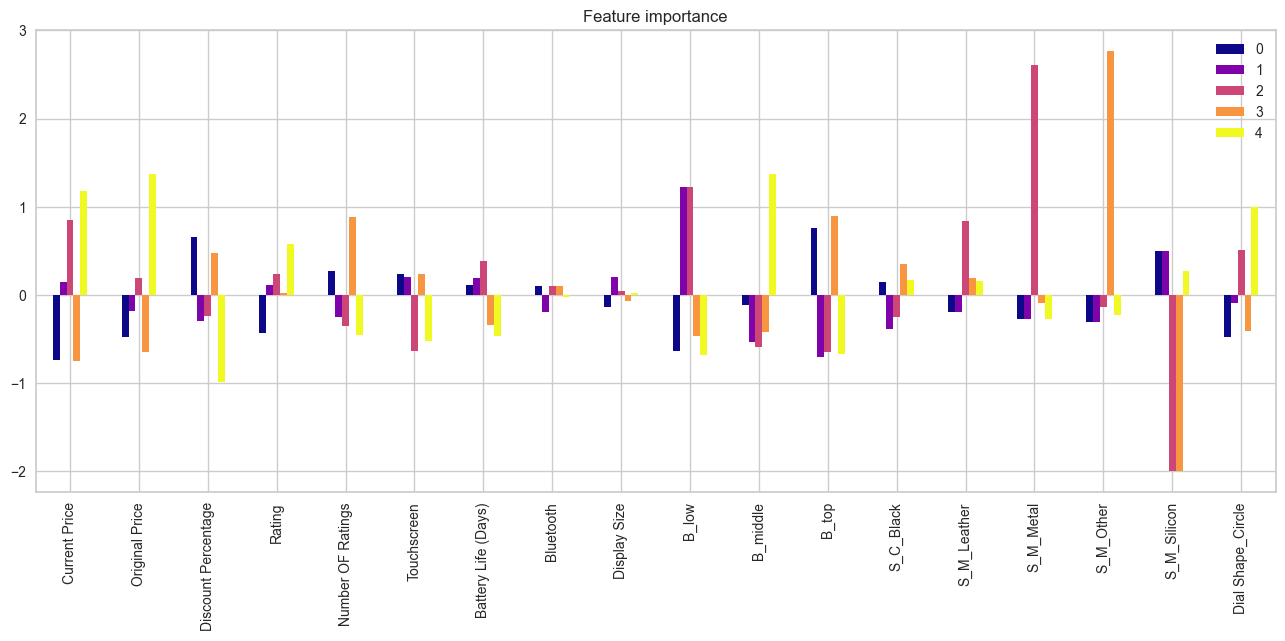

In [69]:
printFeatureImportance(data_std, pred_kmeans_pca)

In [70]:
data1.columns

Index(['Current Price', 'Original Price', 'Discount Percentage', 'Rating',
       'Number OF Ratings', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'B_low', 'B_middle', 'B_top', 'S_C_Black',
       'S_M_Leather', 'S_M_Metal', 'S_M_Other', 'S_M_Silicon',
       'Dial Shape_Circle'],
      dtype='object')

izbacivanje anje bitnih kolona

In [107]:
delete_cols = [ 'Bluetooth',  'Display Size','S_C_Black',"Battery Life (Days)", 'Original Price', 'Touchscreen' ]
data2 = data1.copy()
data2.drop(columns=delete_cols, inplace=True)
data2.head()

Current Price  Discount Percentage  Rating  Number OF Ratings  B_low  \
0      11.326475             7.686318     4.0           4.174387  False   
1       8.242493            77.651627     4.3           9.942131  False   
2       7.600402            74.981227     3.8           9.986173  False   
3       7.494986            91.004550     4.3           9.491300  False   
4       7.377134            68.013603     4.1           9.539716  False   

   B_middle  B_top  S_C_Black  S_M_Leather  S_M_Metal  S_M_Other  S_M_Silicon  \
0     False   True       True        False      False      False         True   
1     False   True       True        False      False      False         True   
2     False   True       True        False      False      False         True   
3     False   True       True        False      False      False         True   
4     False   True       True        False      False       True        False   

   Dial Shape_Circle  
0              False  
1              False  
2              False  
3              False  
4              False

In [108]:
scaler = StandardScaler()
data_st_r = scaler.fit_transform(data2)
data_std_r = pd.DataFrame(data_st_r, columns=data2.columns)

pca1 = PCA(n_components=3, random_state=80)
pca1.fit(data_std_r)
data_pca_r = pd.DataFrame(pca1.transform(data_std_r), columns=(["f1","f2", "f3"]))
pca1.explained_variance_ratio_.cumsum()

array([0.24266207, 0.40337561, 0.53046373])

Elbow Method to determine the number of clusters to be formed:


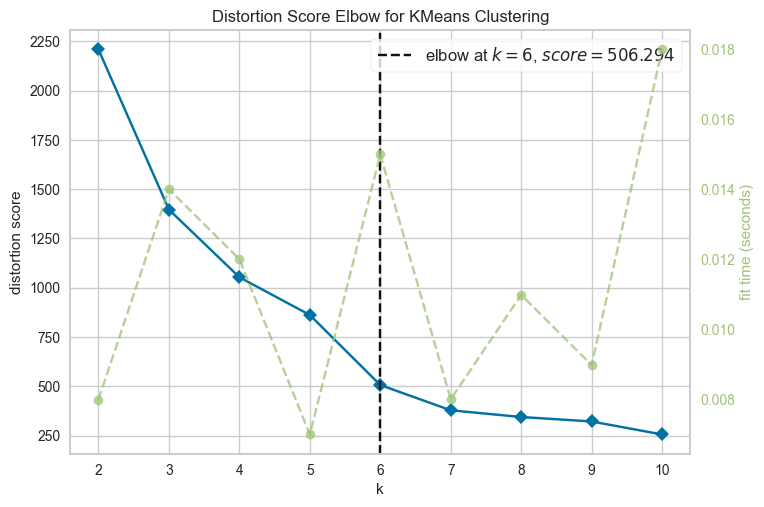

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca_r)
Elbow_M.show()

2 3 4 5 6 7 8 9 

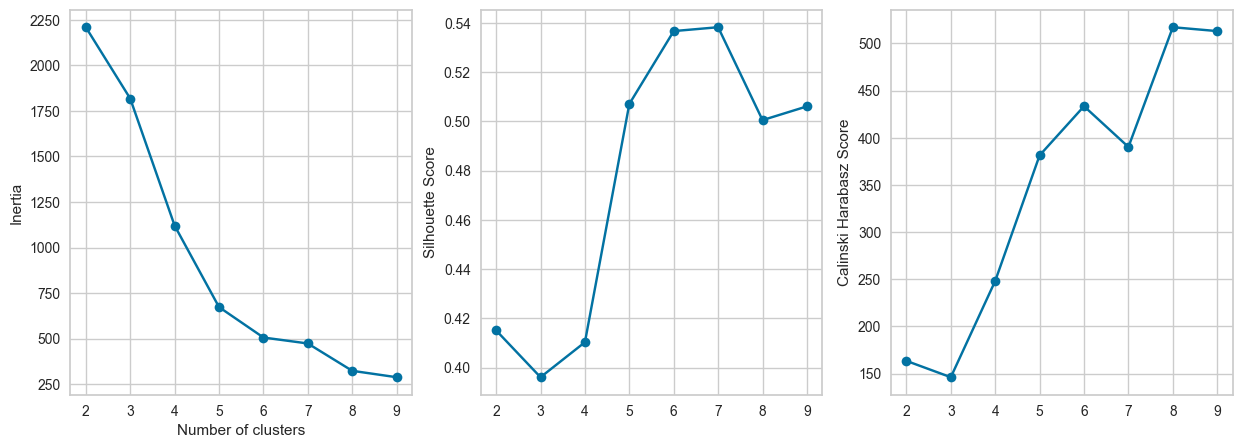

In [109]:
k_range = range(2, 10)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca_r)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_pca_r, kmeans.labels_, sample_size=10000))
    calinski.append(calinski_harabasz_score(data_pca_r, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

calinski_harabasz_score 410.65464252788814
Silhouette score:  0.5313696667440102
Davies-Bouldin score:  0.6520101980097981


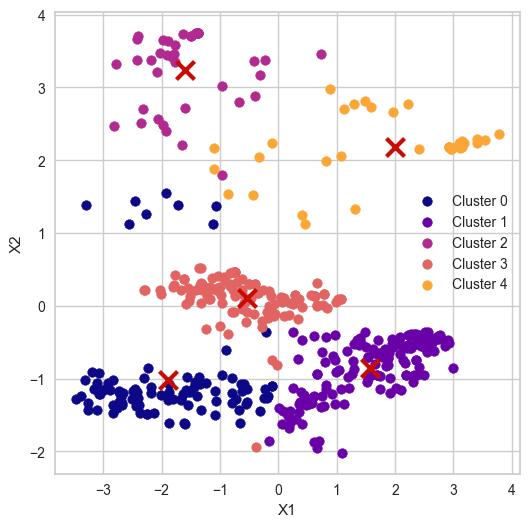

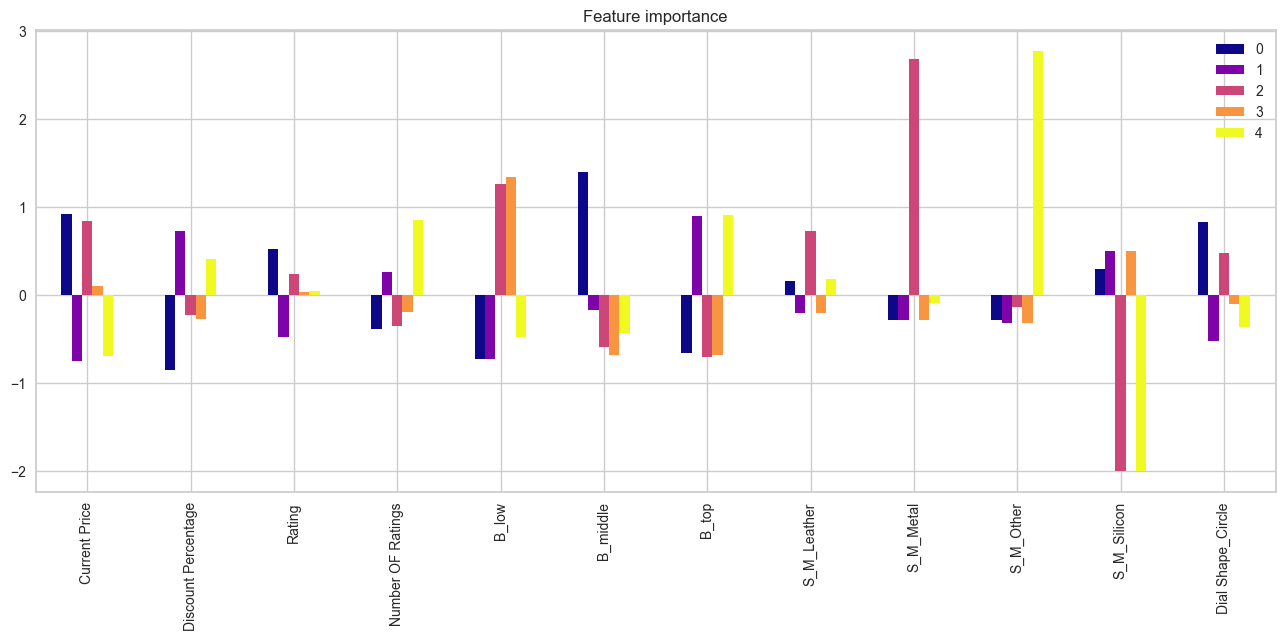

In [106]:
kmeans_pca_r = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca_r)
pred_kmeans_pca_r = kmeans_pca_r.predict(data_pca_r)
claster_center_kmeans_pca_r = kmeans_pca_r.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca_r, data_pca_r, "Reduced PCA KMeans")
printResult(pred_kmeans_pca_r, data_pca_r.values,claster_center_kmeans_pca_r )
print3D(pred_kmeans_pca_r, data_pca_r)
printFeatureImportance(data_std_r, pred_kmeans_pca_r)

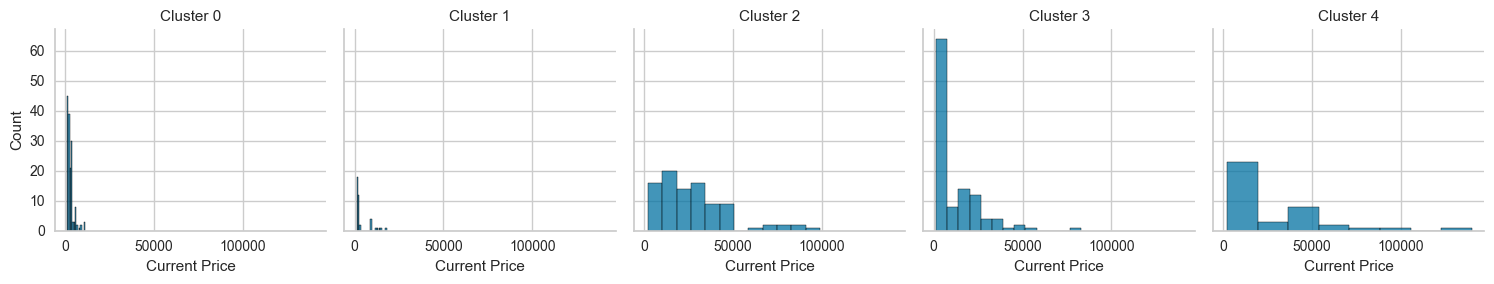

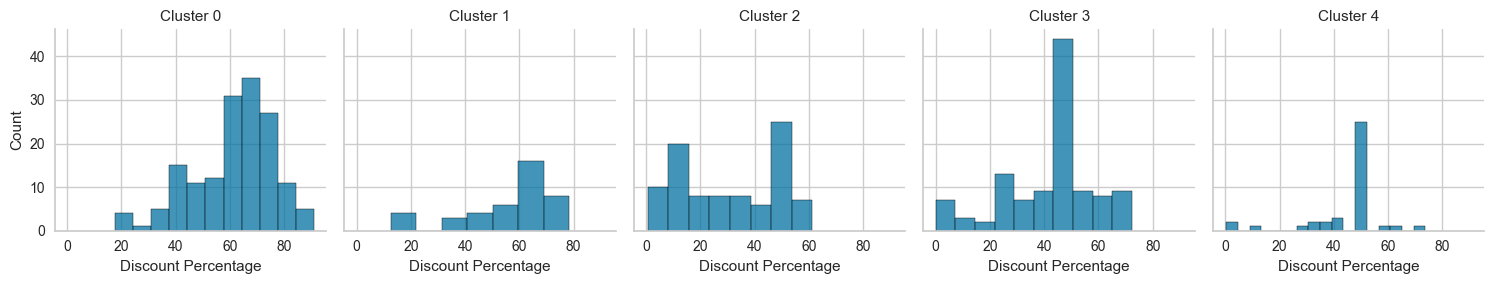

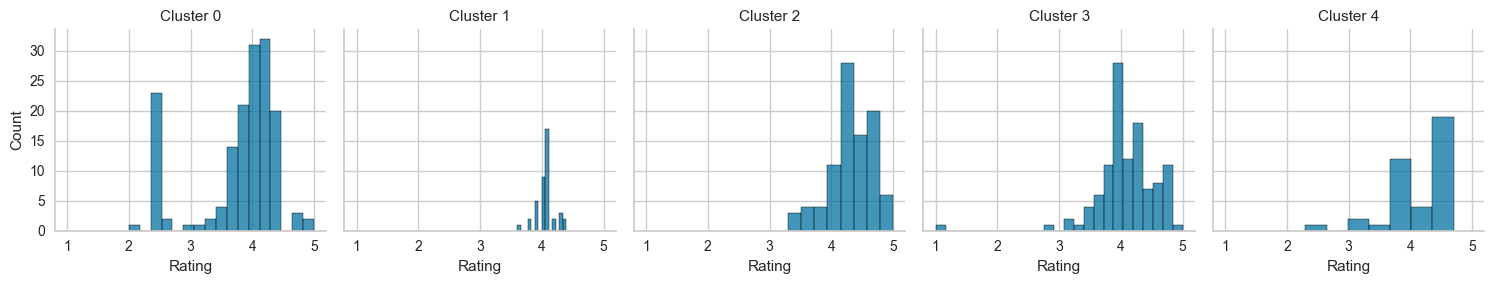

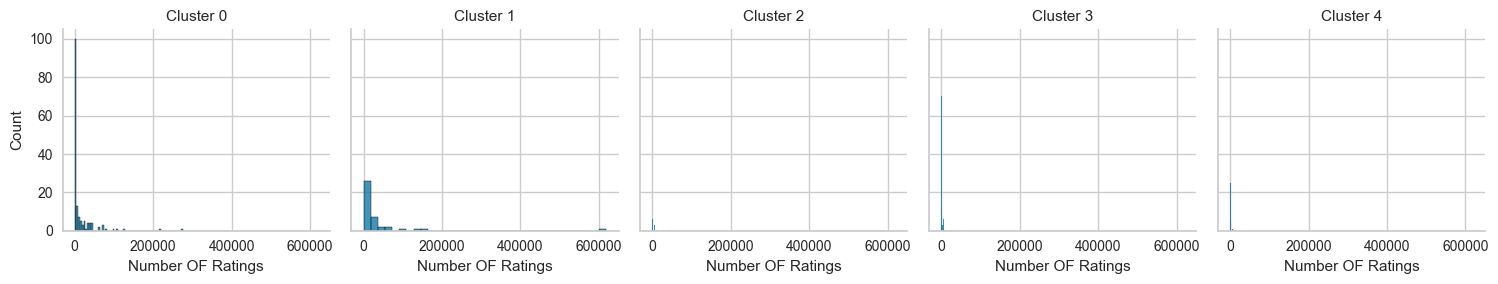

In [101]:
attributes = ['Current Price', 'Discount Percentage', 'Rating', 'Number OF Ratings']
columns = ['Current Price', 'Number OF Ratings']
df_cluster1 = data2.copy()

for column in columns:
    df_cluster1[column] = [np.exp(x) for x in df_cluster1[column]]

df_cluster1['Cluster'] = pred_kmeans_pca_r
for attribute in attributes:
    g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=6)
    g.map(sns.histplot, attribute, kde=False)
    g.set_titles("Cluster {col_name}")
    plt.tight_layout()
    plt.show()

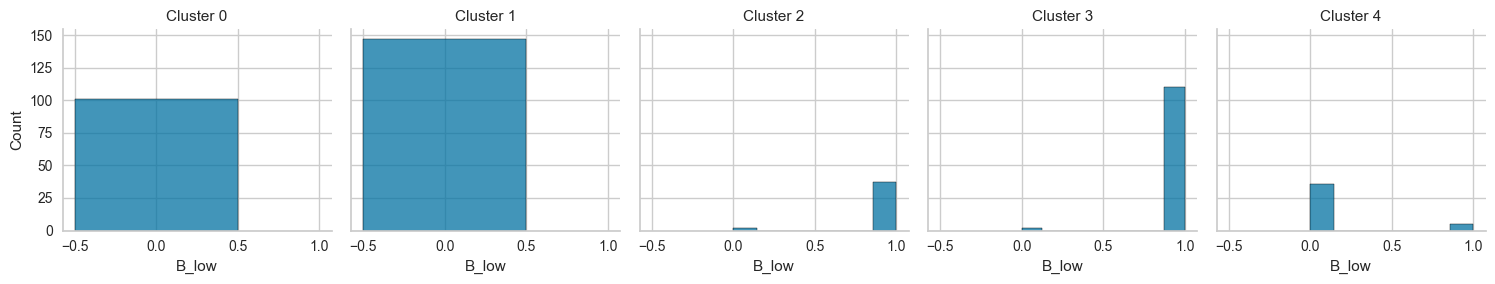

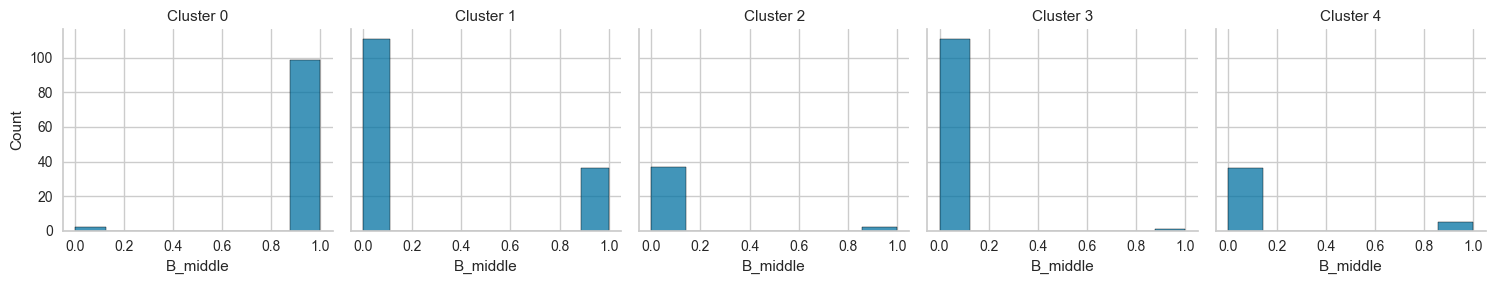

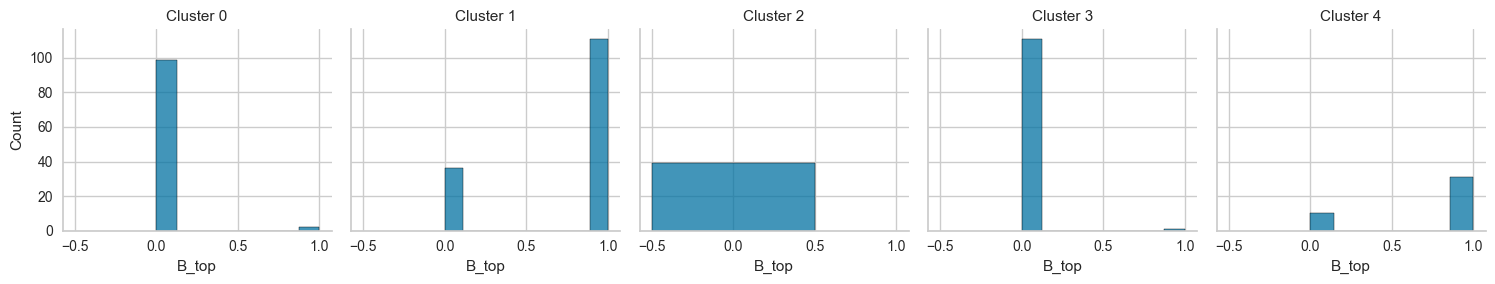

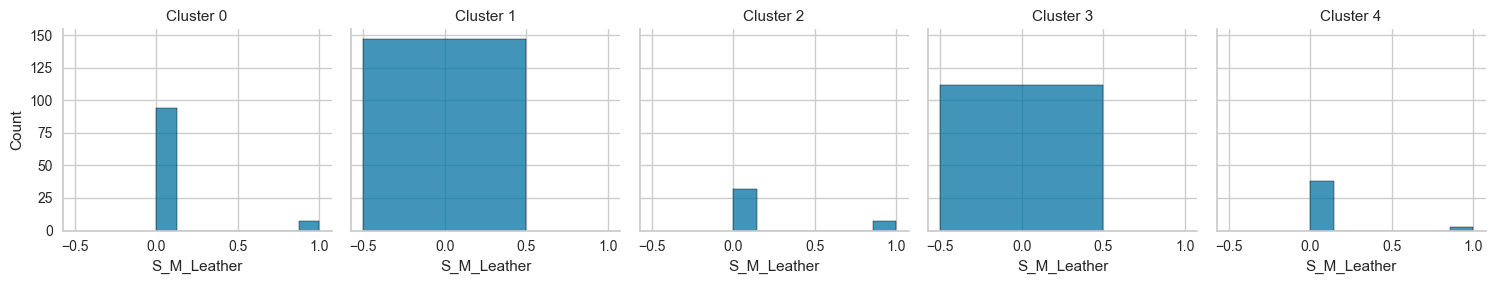

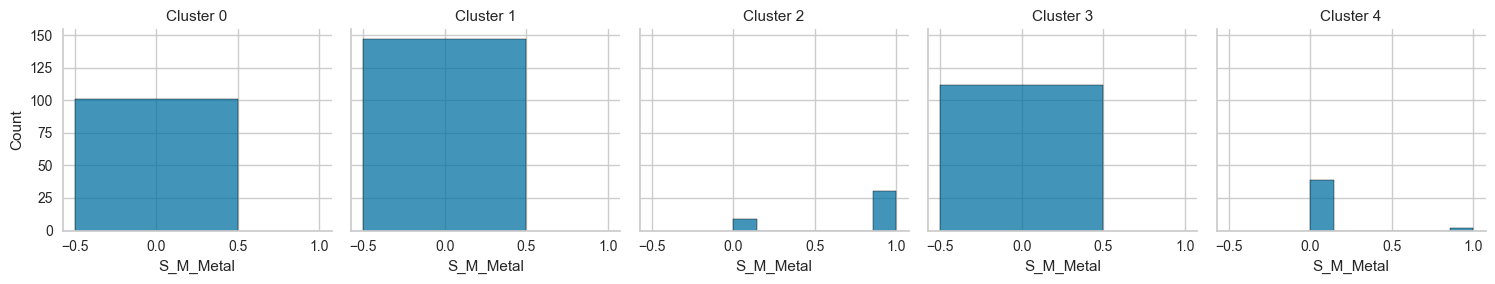

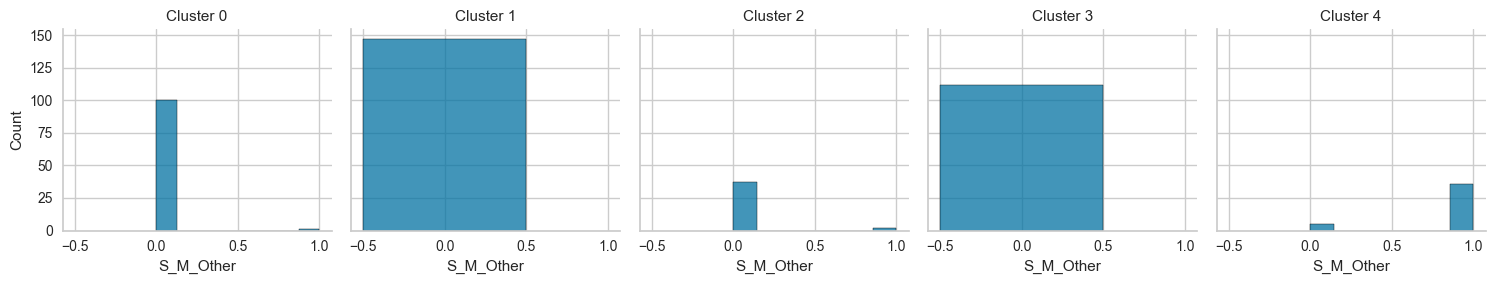

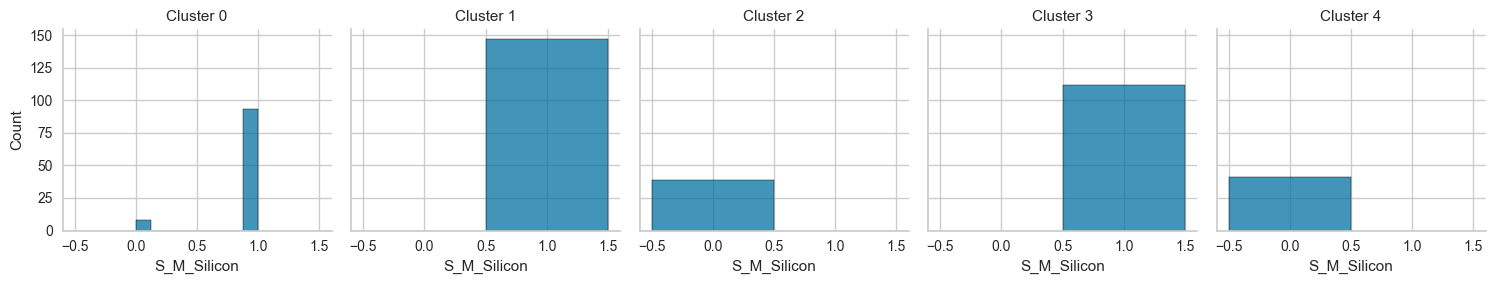

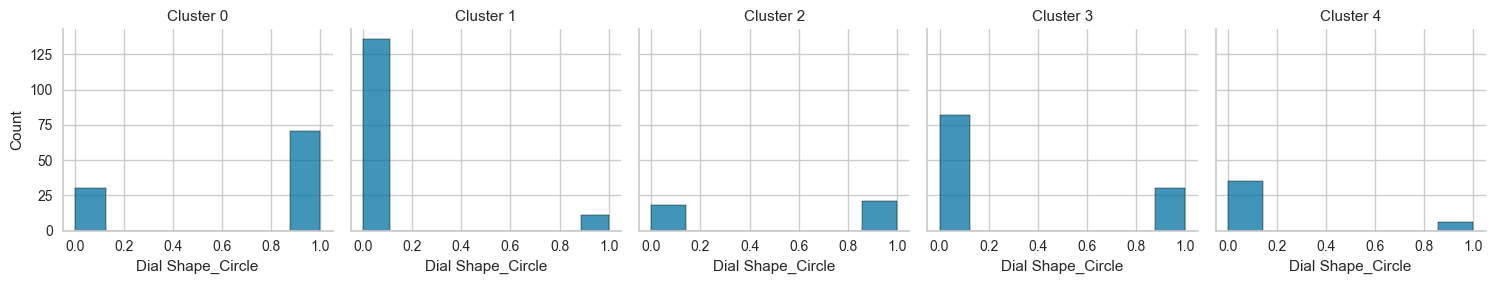

In [117]:
attributes  = ['B_low'	,'B_middle'	,'B_top',	'S_M_Leather',	'S_M_Metal',	'S_M_Other',	'S_M_Silicon',	'Dial Shape_Circle']

for attribute in attributes:
    g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=6)
    g.map(sns.histplot, attribute, kde=False)
    g.set_titles("Cluster {col_name}")
    plt.tight_layout()
    plt.show()


raspodela po klasteria za agglomerative

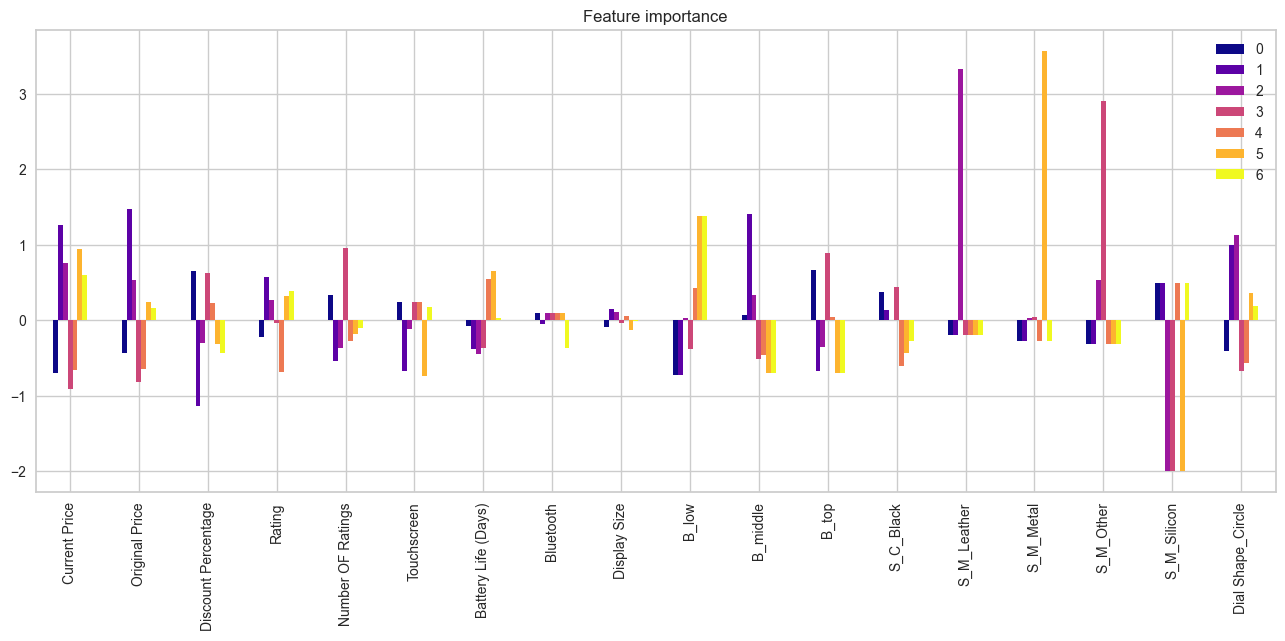

In [93]:
printFeatureImportance(data_std, ac_pred_pca)


In [94]:
delete_cols = [ 'Battery Life (Days)', 'Bluetooth','Display Size' , 'S_C_Black']
data4 = data1.copy()
data4.drop(columns=delete_cols, inplace=True)
data4.head()


Current Price  Original Price  Discount Percentage  Rating  \
0      11.326475       11.406453             7.686318     4.0   
1       8.242493        9.740910            77.651627     4.3   
2       7.600402        8.985946            74.981227     3.8   
3       7.494986        9.903438            91.004550     4.3   
4       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings  Touchscreen  B_low  B_middle  B_top  S_M_Leather  \
0           4.174387         True  False     False   True        False   
1           9.942131         True  False     False   True        False   
2           9.986173         True  False     False   True        False   
3           9.491300         True  False     False   True        False   
4           9.539716         True  False     False   True        False   

   S_M_Metal  S_M_Other  S_M_Silicon  Dial Shape_Circle  
0      False      False         True              False  
1      False      False         True              False  
2      False      False         True              False  
3      False      False         True              False  
4      False       True        False              False

In [95]:

scaler = StandardScaler()
features_std_reduced_a = scaler.fit_transform(data4)
data_std_a_reduced = pd.DataFrame(features_std_reduced_a, columns=data4.columns)

pca_reduced_a = PCA(n_components=3, random_state=80)
pca_reduced_a.fit(data_std_a_reduced)
data_pca_max_r = pd.DataFrame(pca_reduced_a.transform(data_std_a_reduced), columns=(["f1","f2", "f3"]))
pca_reduced_a.explained_variance_ratio_.cumsum()


array([0.26864002, 0.41836789, 0.53670911])

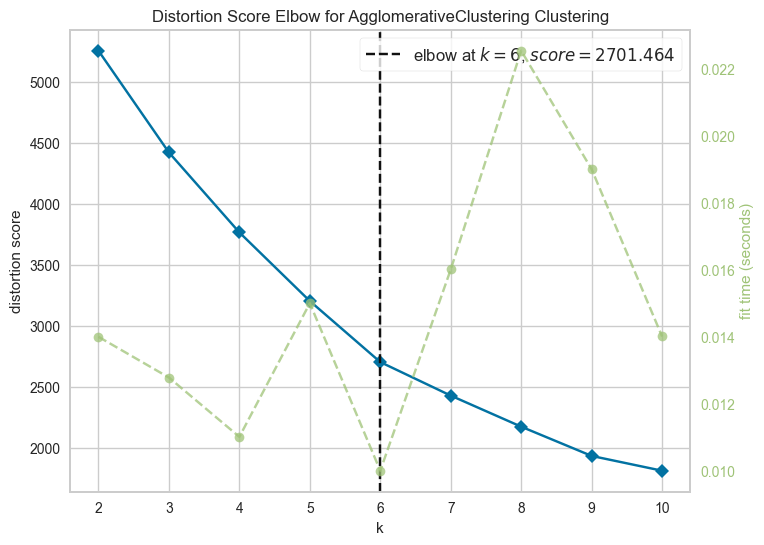

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
plt.figure(figsize=(8, 6))
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(data_std_a_reduced)
Elbow_M.show()

calinski_harabasz_score 377.8351192365795
Silhouette score:  0.4899163099671929
Davies-Bouldin score:  0.7557710880227865


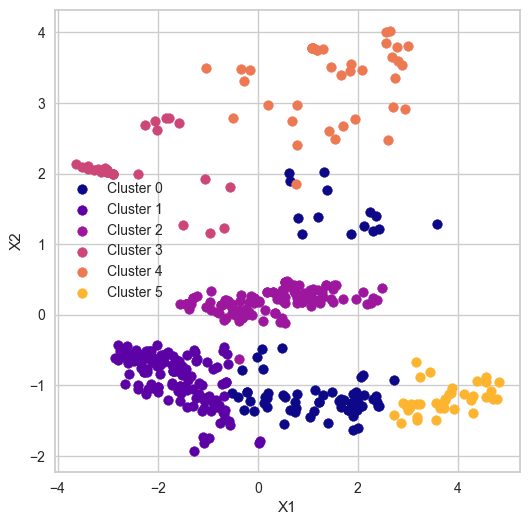

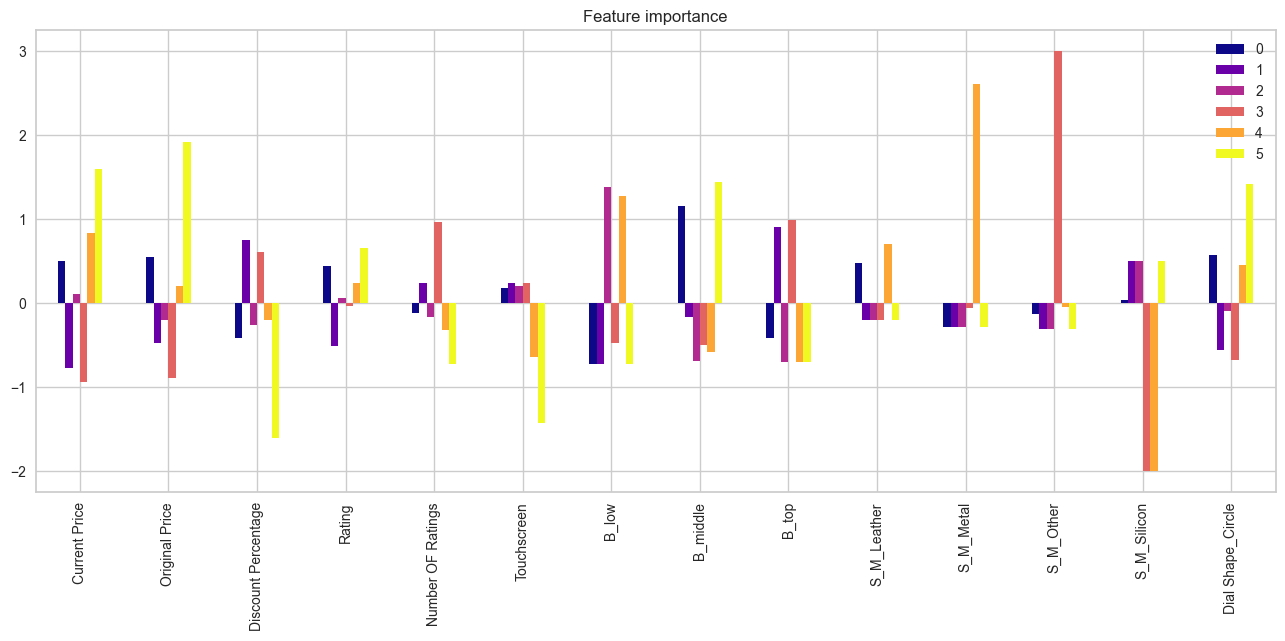

In [96]:
ac_model_pca_reduced = AgglomerativeClustering(n_clusters=6, compute_distances=True)
ac_pred_pca_reduced = ac_model_pca_reduced.fit_predict(data_pca_max_r)

getScore(ac_pred_pca_reduced, data_pca_max_r, "Reduced PCA Agglomerative")
printResult(ac_pred_pca_reduced, data_pca_max_r.values, None )
print3D(ac_pred_pca_reduced, data_pca_max_r)
printFeatureImportance(data_std_a_reduced, ac_pred_pca_reduced)

## Finalni Rezultati
---

In [81]:
result_df.sort_values(by='calinski_harabasz', ascending=False)

calinski_harabasz  Silhouette  Davies-Bouldin
Reduced PCA Agglomerative          377.835119    0.489916        0.755771
Reduced PCA KMeans                 373.308571    0.476978        0.721628
PCA KMeans                         349.536371    0.455930        0.762052
PCA Agglomerative                  314.332739    0.370295        0.882076
PCA Gaussian Mixture               280.143540    0.421040        0.860170
PCA 4 KMeans                       212.570578    0.367816        0.999706
PCA 4 Agglomerative                177.056387    0.343825        0.954619
PCA Spectar clustering              82.878529    0.227011        1.405079
PCA DBSCAN                          79.242981    0.090560        1.144665
Hierarchical Clustering 30          70.962933    0.240037        1.285533
Hierarchical Clustering 40          68.038063    0.143703        2.331606
KMeans                              66.890727    0.207173        1.758883
Agglomerative                       65.076180    0.215469        1.653835
Hierarchical Clustering 35          62.070778    0.200161        1.862713
Hierarchical Clustering 37          61.979237    0.177176        2.166994
Spectar clustering                  60.164525    0.230529        1.655775
Gaussian Mixture                    46.446068    0.136903        2.256470
PCA 4 DBSCAN                        19.926370   -0.103175        1.298049
MeanShift                           18.041226    0.318052        0.745953
DBSCAN                               8.885955   -0.124967        0.994581

## Analiza

Klaster 0  
+cena, rejtin, middle, koza, other,okrugli displej  
-popust, baterija, silikon  
popust do 60 posto, najvise 50

Klaster 1  
+popust, top, silikon, kvadrat displej, crni strap  
-cena, rejtint, low  
popust od 20 do 90, najvise 70
rejting od 3 do 4, a ima i 2.5
baterija 5, 10, 15, 20

Klaster 2  
+cena, middle, okrigli, rejting, pretezno silikon  
-popust, broj rejtinga, baterija, top, low  
popust do 60, najvise 10 i 50
rejting 2.5 i najvise oko 4

Klaster 3  
+cena, low, metalni, okrugli, baterija, rejting, strap u boji  
-popust, top, middle, broj rejtinga  
popust 50 
 najbitnije da su metalni i low, posle toga cena

Klaster 4  
+popust, broj rejtinga, top, strap samo ne silikon, crni strap, kvadrati  
-cena, baterija, silikon, top, middle  
popust 50
rejting nebitan

Klaster 5  
+low, silikon, kvadrat displej, strap u boji  
-popust, top, middle,   
popust od 0 do 70 najvise 50 posto
cena nebitna

Klaster 0  

- cena uglanom jeftinija, popust veliki
- prosecne ocene, ali ima i niskih
- middle brendovi
- kruzni oblik
- materijal silikon, nesto malo metal
- krug

** Nuditi proizvode srednje popularnih brendova, koji imaju nisku cenu i veliki popust i prosecne ocene. Popularni proizvodi sa silikonskom narukvicom kruznog oblika.

Klaster 1 

- jeftiniji proizvodi, bilo koji popust najvise oko 70
- ocene oko 4
- top brendovi, ima malo i middle
- materijal uglavnom silikon, ima i ostalih
- kocka

** Nuditi proizvode veoma poznatih brendova koji su na veikom snizenju i imaju vrlo visoke ocene. Preferirati cetvrtasti obik ekrana i silikonsku traku.

Klaster 2  
- sve moguce cene
- visoke ocene
- low brendovi, ima malo i top
- manje bitan materijal
- oblik i jedan i drugi

**  ???? BILO STA

Klaster 3  
- niska cena, popust oko 50 posto
- ocene od 3 do 5 - visoke
- low brendovi
- materijal uglanom silikon, ali ima i ostalih
- nebitan oblik, malo vise ima kocka

** Nuditi jeftinije proizvode manje poznatih brendova sa prosecnim ocenama.

Klaster 4  
- jeftiniji prizvodi ali ima i skupljih, popust najvise za 50
- uglavnom visoke
- top brendovi, ostalih ima manje
- materijal nebitan, uglavnom ostalo
- oblik manje bitan

** ????


Klaster 0 - 